# Newland - Group 16

###  Create a predictive model to apply to people on their way to Newland

**Group:**
- António Pinto, m20200659
- Davide Farinati, m20201080
- Mohamed Elbawab, m20201102
- Tomás de Sá, m20200630

**Dataset**

- **Variable** - Description
- **Citizen_ID** - Unique identifier of the citizen
- **Name** - Name of the citizen (First name and surname)
- **Birthday** - The date of Birth
- **Native Continent** - The continent where the citizen belong in the planet Earth
- **Marital Status** - The marital status of the citizen
- **Lives with** - The household environment of the citizen
- **Base Area** - The neighborhood of the citizen in Newland
- **Education Level** - The education level of the citizen
- **Years of Education** - The number of years of education of the citizen
- **Employment Sector** - The employment sector of the citizen
- **Role** - The job role of the citizen
- **Working Hours per week** - The number of working hours per week of the citizen
- **Money Received** - The money payed to the elements of Group B
- **Ticket Price** - The money received by the elements of Group C
- **Income** - The dependent variable (Where 1 is Income higher than the average and 0 Income Lower or equal to the average)

# Packages and data imports

In order to replicate the environment we worked in dowload the requirement.txt file and run the cell below. Be sure that the file is in the same repository of the notebook, otherwise either change the path in the code or move the file.

In [ ]:
!pip install -r requirements.txt

In [2]:
#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import math
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import time

#feature selection and handling
from sklearn.impute import KNNImputer
import statsmodels.api as statsm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, normalize, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from  sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif, RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from boruta import BorutaPy
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from numpy import mean
from numpy import std
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.base import clone

#models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

#evaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report, make_scorer, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import KFold, cross_val_score, RepeatedStratifiedKFold

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('Train.xlsx')
data.set_index('CITIZEN_ID', inplace = True)

# First look at the data

In [4]:
data.shape

(22400, 14)

In [5]:
data.head()

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    22400 non-null  object
 1   Birthday                22400 non-null  object
 2   Native Continent        22400 non-null  object
 3   Marital Status          22400 non-null  object
 4   Lives with              22400 non-null  object
 5   Base Area               22400 non-null  object
 6   Education Level         22400 non-null  object
 7   Years of Education      22400 non-null  int64 
 8   Employment Sector       22400 non-null  object
 9   Role                    22400 non-null  object
 10  Working Hours per week  22400 non-null  int64 
 11  Money Received          22400 non-null  int64 
 12  Ticket Price            22400 non-null  int64 
 13  Income                  22400 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.6+ MB


In [7]:
data.dtypes

Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [8]:
numeric = ['Years of Education','Working Hours per week','Money Received','Ticket Price']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Years of Education,22400.0,13.173884,2.512451,2.0,12.0,13.0,15.0,21.0
Working Hours per week,22400.0,40.483795,12.370921,1.0,40.0,40.0,45.0,99.0
Money Received,22400.0,1324.915357,9227.771813,0.0,0.0,0.0,0.0,122999.0
Ticket Price,22400.0,109.145313,500.208904,0.0,0.0,0.0,0.0,5358.0
Income,22400.0,0.237098,0.425313,0.0,0.0,0.0,0.0,1.0


In [9]:
data['Income'].value_counts(normalize=True)

0    0.762902
1    0.237098
Name: Income, dtype: float64

In [10]:
data.isnull().sum()

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [11]:
data.duplicated().sum()

0

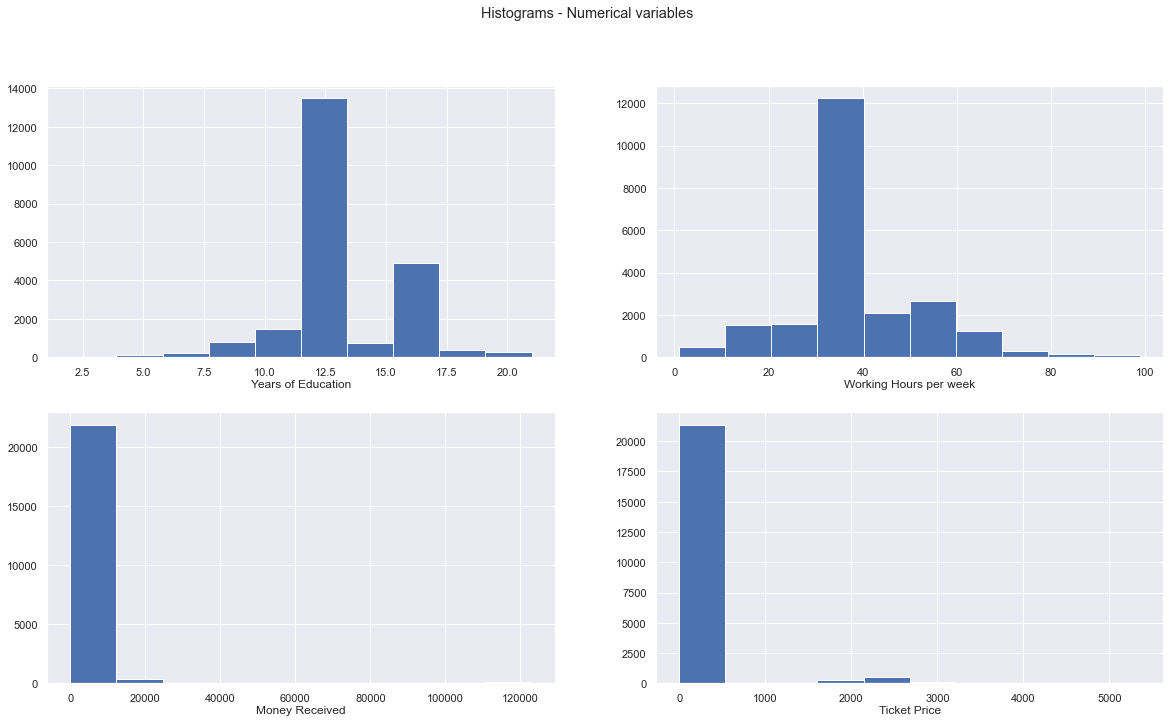

In [12]:
sns.set()
fig, axes = plt.subplots(2, math.ceil(len(numeric) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), numeric):
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Histograms - Numerical variables"

plt.suptitle(title)
plt.show()

First we started by converting data types, changes dates from strings to datetimes.

In [13]:
def datetime_conv(x):
    try:
        datetime.strptime(x, ' %B %d,%Y')
        return 'conversion possible'
    except:
        return x
data[data.Birthday.apply(datetime_conv) != 'conversion possible'].head(5).Birthday

CITIZEN_ID
12845     February 29,2022
12953     February 29,2014
13190     February 29,2006
13596     February 29,1997
14149     February 29,2018
Name: Birthday, dtype: object

Some dates where missclassified and not existant(February 29 in not leap year), we decided to convert them to the 1st of March of the same year.

In [14]:
def datetime_conv(x):
    try:
        return datetime.strptime(x, ' %B %d,%Y')
    except:
        y = ','.join([' March 1', x.split(',')[1]])
        return datetime.strptime(y, ' %B %d,%Y')
data['Age'] = (datetime.strptime(' June 30,2048', ' %B %d,%Y') - data.Birthday.apply(datetime_conv))/np.timedelta64(1,'Y')

Then we tranformed the fixed dates of birth into age.

Then we merged the columns Mooney Received and Ticket Price by substracting the second one to the first one, this way we have either a negative value when they paid to go to Newland, a positive value if they got paid and 0 if they were voluntaries.

In [15]:
data['Money Received/Ticket Price'] = data['Money Received'] - data['Ticket Price']

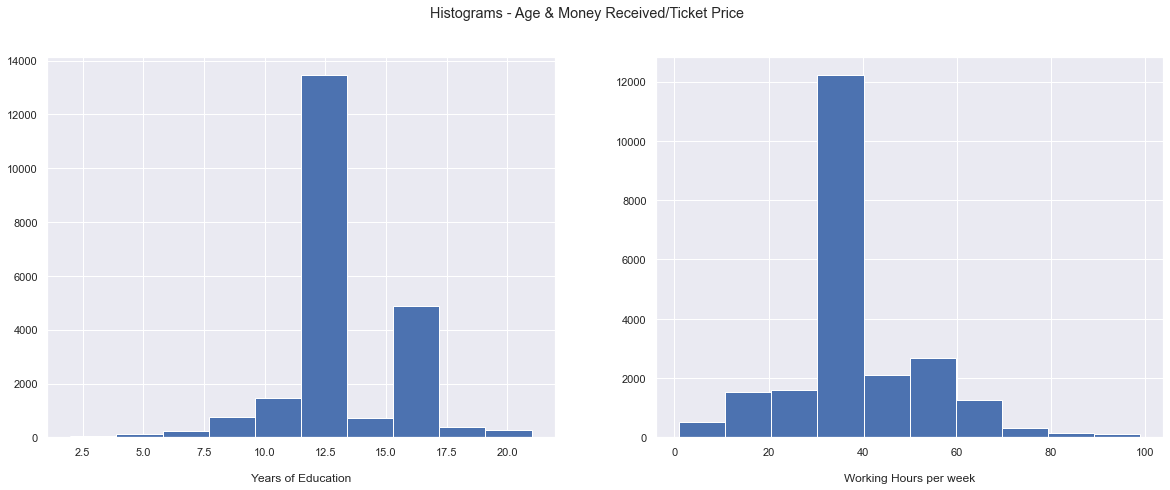

In [16]:
sns.set()
fig, axes = plt.subplots(1, math.ceil(len(['Age', 'Money Received/Ticket Price'])), figsize=(20, 7))

for ax, feat in zip(axes.flatten(), numeric):
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Histograms - Age & Money Received/Ticket Price"

plt.suptitle(title)
plt.show()

From the Name column we extract a binary for gender, 1 if it contains Mr, therefores is a man and 0 if it's a woman.

In [17]:
data["Gender_M"] = data['Name'].map(lambda x: 1 if x.split(' ')[0] == 'Mr.' else 0)

After this feautures extraction we drop the columns name, birthday, Ticket Price and Money Received since we don't need them anymore.

In [18]:
cols_to_keep = ['Gender_M', 'Native Continent', 'Marital Status','Lives with','Base Area','Education Level','Years of Education','Age','Employment Sector','Role','Working Hours per week','Money Received/Ticket Price', 'Income']
data = data[cols_to_keep].copy()
data.head(1)

,Gender_M,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Age,Employment Sector,Role,Working Hours per week,Money Received/Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,
12486,1,Europe,Married,Wife,Northbury,High School + PostGraduation,13,45.00024,Private Sector - Services,Repair & constructions,40,-2273,1


We can drop the Education Level variable since is just a discretization of the years of education variable.

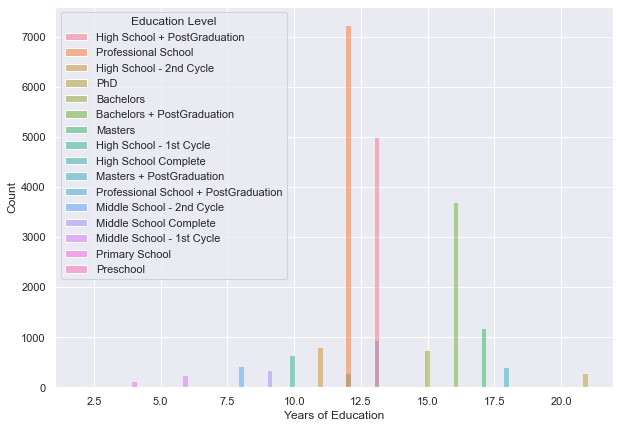

In [19]:
plt.figure(figsize=(10, 7))
sns.histplot(data = data, x = 'Years of Education', hue = 'Education Level')
plt.show()

In [20]:
data.drop(columns = ['Education Level'], inplace= True)

# Data Incoherence

After looking at the ditrubutions we notiice that the variable Working Hours per week has some values that don't make sense, indeed it doesnt make sense for a person to work for more than 65 hours per week.

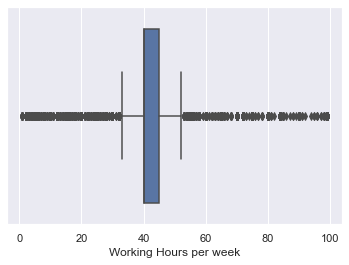

In [21]:
sns.boxplot(data['Working Hours per week'])
plt.show()

In [22]:
print(len(data[data['Working Hours per week'] < 65])/len(data))
data = data[data['Working Hours per week'] < 65].copy()

0.9661607142857143


# Normalization

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21642 entries, 12486 to 34885
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender_M                     21642 non-null  int64  
 1   Native Continent             21642 non-null  object 
 2   Marital Status               21642 non-null  object 
 3   Lives with                   21642 non-null  object 
 4   Base Area                    21642 non-null  object 
 5   Years of Education           21642 non-null  int64  
 6   Age                          21642 non-null  float64
 7   Employment Sector            21642 non-null  object 
 8   Role                         21642 non-null  object 
 9   Working Hours per week       21642 non-null  int64  
 10  Money Received/Ticket Price  21642 non-null  int64  
 11  Income                       21642 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.1+ MB


We divide the variables in metric, binary and non metric for better future habdling.

In [24]:
metric = data.drop(columns = ['Income', 'Gender_M']).select_dtypes(include = [float, 'int64']).columns.to_list()
binary = ['Gender_M']
non_metric = data.select_dtypes(exclude = [float, 'int64']).columns.to_list()

We will apply the box cox, yeo jhonson and quantile power transformations to the metric variables. The Box cox power transformation can be applied only to strictly positive values, therefore we need adding 1 + the min value to the full Money Received/Ticket Price column. 

In [25]:
pd.DataFrame(data[metric]  <= 0).any()

Years of Education             False
Age                            False
Working Hours per week         False
Money Received/Ticket Price     True
dtype: bool

In [26]:
bc_data = data[metric].copy()
bc_data['Money Received/Ticket Price']= data['Money Received/Ticket Price'].values + abs(data['Money Received/Ticket Price'].min())+1
# Transformations
rng = np.random.RandomState(304)
bc = prep.PowerTransformer(method='box-cox')
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rng)

# Perform power transforms and quantile transform
data_bc = bc.fit_transform(bc_data)
data_yj = yj.fit_transform(data[metric])
data_qt = qt.fit_transform(data[metric])

# Merging
data_trans = np.concatenate((data_bc, data_yj, data_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "bc_" + x, data[metric].columns.to_list()))+list(map(lambda x: "yj_" + x, data[metric].columns.to_list()))+list(map(lambda x: "qt_" + x, data[metric].columns.to_list()))
trans_df = pd.DataFrame(data_trans, columns=merge_labels, index=data[metric].index)

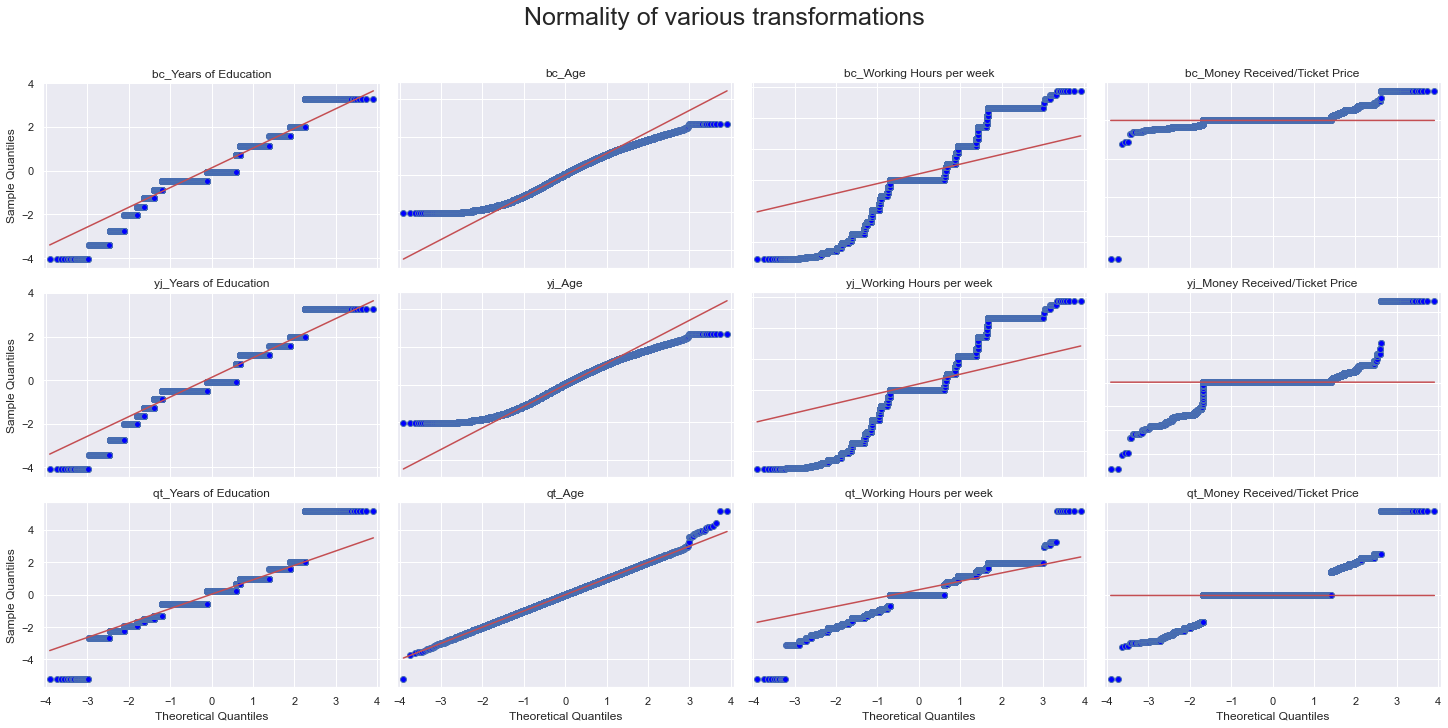

In [27]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(3,4, constrained_layout=True, figsize=(20,10))

fig.suptitle("Normality of various transformations\n", fontsize=25)

for col, ax in zip(trans_df.columns, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

We check the qqplots, the closest the plot is to the red line the 'more normal' the distribution is, and for every column we choose the best transformation. From this plot we could also spot some values that could be considered as outliers.

In [28]:
data['Age'] = trans_df['qt_Age'].copy()
data['Years of Education'] = trans_df['yj_Years of Education'].copy()
data['Working Hours per week'] = trans_df['qt_Working Hours per week'].copy()
data['Money Received/Ticket Price'] = trans_df['bc_Money Received/Ticket Price'].copy()

# Train, Validation split

Before trating outliers and missing values we split the data in test and validation datasets.

In [29]:
data_train, data_val = train_test_split(data, stratify = data.Income, random_state = 7, test_size = 0.3)

# Treating Outliers

## Univariate Outliers

To check outlier we are going to use the z_score method, the median absolute deviation and the iqr methods.

In [30]:
def out_zscore(df, threshold = 3.0):
    z = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns, index = df.index)
    z = pd.DataFrame(z > threshold)
    return z.any(axis = 1).astype(int)
def out_mad(df, threshold = 3.0):
    t = df.apply(lambda x: (x - np.median(x))/np.abs(stats.median_abs_deviation(x)))
    t = pd.DataFrame(t > threshold)
    return t.any(axis = 1).astype(int)
def out_iqr(df, multiplier = 1.5):
    q3 = df.quantile(0.75, axis = 0)
    q1 = df.quantile(0.25, axis = 0)
    iqr = q3 - q1
    lower_bound = q1 - multiplier*iqr
    upper_bound = q3 + multiplier*iqr
    return df.apply(lambda x: np.any((x<lower_bound) | (x>upper_bound)), 1).astype(int)

To use the mad method I have first to check that no variable has 50% or more data points wit the same value.

In [31]:
for column in metric:
    print(column, data_train[column].value_counts(normalize = True).iloc[0])

Years of Education 0.33441151231104366
Age 0.0005280876625519837
Working Hours per week 0.4857086276321869
Money Received/Ticket Price 0.871872730873325


We cannot use the mad method for Money Received/Ticket Price

In [32]:
outliers = pd.DataFrame()
outliers['z_score'] = out_zscore(data_train[metric], threshold=3.5)
outliers['mad'] = out_mad(data_train[metric].drop(columns = 'Money Received/Ticket Price'), threshold = 3.5)
outliers['iqr'] =  out_iqr(data_train[metric], multiplier=2.5) #changing the multiplier

In [33]:
# outliers.value_counts()
outliers.groupby(['z_score', 'mad', 'iqr']).size()

z_score  mad  iqr
0        0    0      11623
              1       1926
         1    0        927
              1        312
1        0    0          2
              1        230
         1    0          8
              1        121
dtype: int64

We are going to consider outliers the data point that are outliers that are considered outliers by atleast two methods.

In [34]:
len(outliers.query('z_score == 1 & mad == 1 | z_score == 1 & iqr == 1 | iqr == 1 & mad == 1')) / len(outliers) *100

4.4293352696547625

There are 4.42% values that are classified as ouliers

In [35]:
# data_train.drop(index = outliers.query('z_score == 1 & mad == 1 | z_score == 1 & iqr == 1 | iqr == 1 & mad == 1').index, inplace = True)

## Multivariate Outliers

After checking for univariate outliers we then check for multivariate outliers.

### Scaling the metric features

We scale the metric features so they are all in the same range, in this  we use the MinMax scaler, that transforms the range to [0,1]. **We decided to use this scaling for two reasons:**
 - After comparing different models performances of data scaled with different scalers (Standard, Robust, MinMax(-1,1)) the data scaled with MinMax(0,1) had the best performance
 - This way the data has the same range as the binary variables

In [36]:
scaler = MinMaxScaler()
data_train[metric] = scaler.fit_transform(data_train[metric]).copy()

### DBSCAN

We use dbscan to identify multivariate outliers, in order to decide the right value fro the epsilon we plot the K-distance graph, using 2xn_features - 1 neighbors (2x4-1= 7), and select the value at the elbow. the epsilon parameter is used to set the radius of the neighborhood in the DBSCAN algo.

In [37]:
neigh = NearestNeighbors(n_neighbors=7)
neigh.fit(data_train[metric])
knn_distances, _ = neigh.kneighbors(data_train[metric])

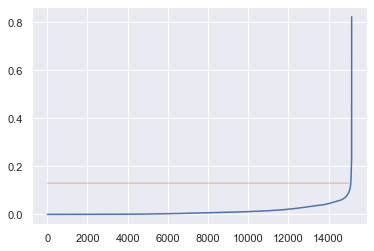

In [38]:
knn_s_distances = np.sort(knn_distances[:, -1])
plt.plot(knn_s_distances)
plt.plot(range(0, 15000), [0.13 for i in range(0, 15000)], alpha = 0.4)
plt.show()

We set epsilon = 0.14, the minum number of value to consider a group of points a neighborhood(min_samples) equal to 2xnumber of features, and run the dbscan algo.

In [39]:
dbscan = DBSCAN(eps=0.14, min_samples=8, n_jobs=-1)
dbscan_labels = pd.Series(dbscan.fit_predict(data_train[metric]), index = data_train[metric].index)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


The one classified as -1 are considered outliers by the algorithm.

In [40]:
dbscan_labels.value_counts(normalize = True)

 0    0.986732
 1    0.011948
-1    0.001320
dtype: float64

We reduce the data in two dimension with PCA too visualize the points classified as outliers.

In [41]:
pca = PCA(n_components = 2)
d2_data = pd.DataFrame(pca.fit_transform(data_train[metric]), columns = ['PCA1', 'PCA2'], index = data_train[metric].index)

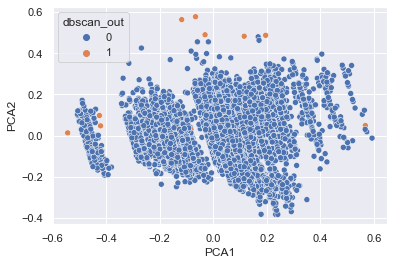

In [42]:
d2_data['dbscan_out'] = [0 for i in range(len(d2_data))]
d2_data.loc[dbscan_labels[dbscan_labels == -1].index, 'dbscan_out'] = 1
sns.scatterplot(data = d2_data, x = 'PCA1', y = 'PCA2', hue = 'dbscan_out')
plt.show()

### Isolation Forest

In order to not delete points that are not actually multivariate outliers We are going to use another method to validate the results obtained from the DBSCAN.

At the basis of the Isolation Forest algorithm there is the tendency of anomalous instances in a dataset to be easier to separate from the rest of the sample (isolate), compared to normal points. In order to isolate a data point the algorithm recursively generates partitions on the sample by randomly selecting an attribute and then randomly selecting a split value for the attribute, between the minimum and maximum values allowed for that attribute. When all the trees are grown outliers are identified as points easier to isolate, therefore with a smaller path lenght in the tree, being closer to the root. 

We are going to set the contamination parameter(fraction of outliers expected) as the fraction found using DBSCAN. 

In [43]:
clf = IsolationForest(random_state = 7, bootstrap=True, contamination=0.004144)
clf.fit(data_train[metric])
isofor_outliers = pd.Series(clf.predict(data_train[metric]), index = data_train[metric].index)

In [44]:
isofor_outliers.value_counts(normalize = True)

 1    0.995841
-1    0.004159
dtype: float64

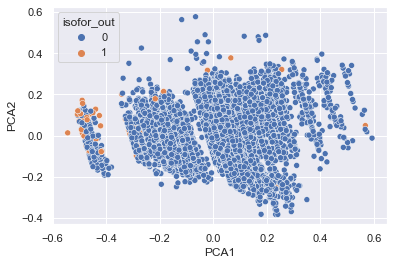

In [45]:
d2_data['isofor_out'] = [0 for i in range(len(d2_data))]
d2_data.loc[isofor_outliers[isofor_outliers == -1].index, 'isofor_out'] = 1
sns.scatterplot(data = d2_data, x = 'PCA1', y = 'PCA2', hue = 'isofor_out')
plt.show()

In [46]:
d2_data.groupby(['dbscan_out', 'isofor_out']).size()

dbscan_out  isofor_out
0           0             15070
            1                59
1           0                16
            1                 4
dtype: int64

In [47]:
len(d2_data.query('dbscan_out == 1 & isofor_out == 1')) / len(d2_data) *100

0.02640438312759918

There are 21(almost 0.15%) values that are classified by both methods as ouliers.

In [48]:
# data_train.drop(index = d2_data.query('dbscan_out == 1 & isofor_out == 1').index, inplace = True)

Removing both the univariate and multivariate outliers contributed to a decrease on the performance of our model, for this reason we decided to comment this cell and keep them on the dataset.

# Imputing missing values

In the datasets there are no nan values, but some columns have some '?' values, that we will try to impute with different models. 

## Performing One Hot Encoding on categorical Variables

In [49]:
data_train_nan = data_train.drop(columns = 'Income').copy()

In [50]:
data_train_nan.replace('?', np.nan, inplace = True)
data_train_nan.isna().sum()/len(data_train)*100

Gender_M                       0.000000
Native Continent               0.000000
Marital Status                 0.000000
Lives with                     0.000000
Base Area                      1.755891
Years of Education             0.000000
Age                            0.000000
Employment Sector              5.617533
Role                           5.637336
Working Hours per week         0.000000
Money Received/Ticket Price    0.000000
dtype: float64

After removing the columns we don't want to impute we convert the categorical variables in to binary columns using some rules to limit the number of new columns. This method of enconding gave us better performances withe the models than the label encoder.

In [51]:
columns_missing_values = ['Base Area', 'Employment Sector', 'Role']

for column in columns_missing_values:
    data_train_nan[column] = data_train_nan[column].astype('category').copy()
    data_train_nan[f'{column} code']= data_train_nan[column].cat.codes

data_train_nan.replace(-1, np.nan, inplace = True)

In [52]:
data_train_ohc = data_train_nan.drop(columns = ['Base Area', 'Employment Sector', 'Role', 'Base Area code', 'Employment Sector code', 'Role code']).copy()

We start by transforming the categorical variables that don't have any missing value, in order to become numerical (in this case binary) and contribute to models that only work with numeric features.

In [53]:
# Transform 'lives with' into a binary columns where 1: Partner (Wife and Husband); and 0: Other (Alone, Children, Other Family,
# Other relatives)
data_train_ohc['Lives with'] = [1 if l in ['Wife', 'Husband'] else 0 for l in data_train_ohc['Lives with']]

encode = ['Native Continent', 'Marital Status']

df_ohc = data_train_ohc.copy()
ohc_nc_ms = OneHotEncoder(sparse=False)
ohc_feat = ohc_nc_ms.fit_transform(df_ohc[encode])
ohc_feat_names = [x.replace('x0', 'Native Continent').replace('x1', 'Marital Status') for x in ohc_nc_ms.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_train_ohc = pd.concat([data_train_ohc, ohc_df], axis=1)
data_train_ohc.drop(columns = ['Native Continent', 'Marital Status'], inplace = True)

Saving this dataset to use them later to impute missing values for Validation and test

In [54]:
data_train_ohc_2 = data_train_ohc.copy()
data_train_nan_2 = data_train_nan.copy()

## Select the model to impute the missing values

In [55]:
for i,column in enumerate(columns_missing_values):
    
    nans_index = data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()].index
    
    X = data_train_ohc[data_train_ohc.index.map(lambda x: x not in nans_index.to_list())]
    y = data_train_nan[f'{column} code'][~data_train_nan[f'{column} code'].isna()].copy()
    
    imputer = KNeighborsClassifier(n_neighbors = 30, metric = 'manhattan', weights = 'uniform')
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,
                                                             shuffle = True, stratify = y, random_state = 7)
    
    imputer.fit(X_train, y_train)
    train_score = imputer.score(X_train, y_train)
    val_score = imputer.score(X_val, y_val)
    print(f'For {column} the score is {train_score} on training and {val_score} on validation')

For Base Area the score is 0.9173545786139374 on training and 0.916013437849944 on validation
For Employment Sector the score is 0.7453037569944044 on training and 0.7431235431235431 on validation
For Role the score is 0.353088147111733 on training and 0.3019351830263465 on validation


In [56]:
for i,column in enumerate(columns_missing_values):
    
    nans_index = data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()].index
    
    X = data_train_ohc[data_train_ohc.index.map(lambda x: x not in nans_index.to_list())]
    y = data_train_nan[f'{column} code'][~data_train_nan[f'{column} code'].isna()].copy()
    
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.4,
                                                             shuffle = True, stratify = y, random_state = 7)
    
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.75,
                                                             shuffle = True,  random_state = 7) #stratify = y_val_test,
    imputer = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 7)
    #Using early stopping to avoid overfitting
    eval_set = [(X_val, y_val)]
    imputer.fit(X_train, y_train, eval_set=eval_set, eval_metric='merror',early_stopping_rounds=10, verbose = False)
    train_score = imputer.score(X_train, y_train)
    val_score = imputer.score(X_test, y_test)
    print(f'For {column} the score is {train_score} on training and {val_score} on test')

For Base Area the score is 0.9216037630193751 on training and 0.919167039856695 on test
For Employment Sector the score is 0.7452786197248776 on training and 0.7398601398601399 on test
For Role the score is 0.3502390113093156 on training and 0.32688272324551176 on test


In [57]:
for i,column in enumerate(columns_missing_values):
    
    nans_index = data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()].index
    
    X = data_train_ohc[data_train_ohc.index.map(lambda x: x not in nans_index.to_list())]
    y = data_train_nan[f'{column} code'][~data_train_nan[f'{column} code'].isna()].copy()
    
    imputer = RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=11)#, class_weight='balanced')
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,
                                                             shuffle = True, stratify = y, random_state = 7)
    
    imputer.fit(X_train, y_train)
    train_score = imputer.score(X_train, y_train)
    val_score = imputer.score(X_val, y_val)
    print(f'For {column} the score is {train_score} on training and {val_score} on validation')

For Base Area the score is 0.9203301977346899 on training and 0.9180291153415453 on validation
For Employment Sector the score is 0.7451039168665068 on training and 0.7447552447552448 on validation
For Role the score is 0.34239456326204276 on training and 0.32734903240848684 on validation


In [58]:
for i,column in enumerate(columns_missing_values):
    
    nans_index = data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()].index
    
    X = data_train_ohc[data_train_ohc.index.map(lambda x: x not in nans_index.to_list())]
    y = data_train_nan[f'{column} code'][~data_train_nan[f'{column} code'].isna()].copy()
    
    imputer = GaussianNB(var_smoothing=10)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,
                                                             shuffle = True, stratify = y, random_state = 7)
    
    imputer.fit(X_train, y_train)
    train_score = imputer.score(X_train, y_train)
    val_score = imputer.score(X_val, y_val)
    print(f'For {column} the score is {train_score} on training and {val_score} on validation')

For Base Area the score is 0.9122672297945863 on training and 0.9122060470324748 on validation
For Employment Sector the score is 0.7448041566746603 on training and 0.7447552447552448 on validation
For Role the score is 0.21507095742554466 on training and 0.2063418046164607 on validation


We are going to use XGBoost to impute missing values for Base Area and Employment Sector, while for the Role we will keep the missing values as ? since we didn't find a good enough method to impute them.

In [59]:
columns_to_impute = ['Employment Sector', 'Base Area']

## Imputing Missing Values

In [60]:
imputer_xgb = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 7)

for column in columns_to_impute:
    
    nans_index = data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()].index
    
    X_train =  data_train_ohc[data_train_ohc.index.map(lambda x: x not in nans_index.to_list())]
    y_train = data_train_nan[f'{column} code'][~data_train_nan[f'{column} code'].isna()].copy()
    
    X_imp =  data_train_ohc.loc[nans_index.to_list(), :]

    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                             shuffle = True, stratify = y_train, random_state = 7)
    
    eval_set = [(X_val, y_val)]
    imputer_xgb.fit(X_train2, y_train2, eval_set=eval_set, eval_metric='merror',early_stopping_rounds=10, verbose = False)
    y_imp = imputer_xgb.predict(X_imp)
    
    
    data_train_nan[f'{column} code'][data_train_nan[f'{column} code'].isna()] = y_imp

In [61]:
#And apply the filling also to the categorical variable
for column in columns_to_impute:
    data_train_nan[column] = data_train_nan[column].cat.categories[data_train_nan[f'{column} code'].astype(int)]

In [62]:
data_train_nan['Role'] = data_train['Role'].copy()

## Applying the one hot enconding also to the columns to which we imputed the missing values

In [63]:
data_train_ohc = data_train_ohc.merge(data_train_nan[columns_missing_values], left_index= True, right_index=True).copy()

In [64]:
# Apply binary for base area. Either Northbury or not Northbury
data_train_ohc['Base Area'] = [1 if l in ['Northbury'] else 0 for l in data_train_ohc['Base Area']]

In [65]:
# Apply One Hot Encoder for top 6 'Role' (+ 7 columns).
topRole_train = data_train_ohc['Role'].value_counts().index[:6]
topRole = data_train_ohc['Role'].isin(data_train_ohc['Role'].value_counts().index[:6])
data_train_ohc.loc[~topRole, 'Role'] = "Other"

df_ohc = data_train_ohc.copy()
ohc_r = OneHotEncoder(sparse=False)
ohc_feat = ohc_r.fit_transform(df_ohc[['Role']])
ohc_feat_names = [x.replace('x0', 'Role') for x in ohc_r.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_train_ohc = pd.concat([data_train_ohc, ohc_df], axis=1)
data_train_ohc.drop(columns = ['Role'], inplace = True)

'?' will be treated as a minority class.

In [66]:
# Apply One Hot Encoder for top 6 'Employment Sector' (+ 7 columns).
topEmploymentSector_train = data_train_ohc['Employment Sector'].value_counts().index[:6]
topEmploymentSector = data_train_ohc['Employment Sector'].isin(data_train_ohc['Employment Sector'].value_counts().index[:6])
data_train_ohc.loc[~topEmploymentSector, 'Employment Sector'] = "NotWorking"
data_train_ohc['Employment Sector'].unique()

df_ohc = data_train_ohc.copy()

ohc_es = OneHotEncoder(sparse=False)
ohc_feat = ohc_es.fit_transform(df_ohc[['Employment Sector']])
ohc_feat_names = [x.replace('x0', 'Employment Sector') for x in ohc_es.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_train_ohc = pd.concat([data_train_ohc, ohc_df], axis=1)
data_train_ohc.drop(columns = ['Employment Sector'], inplace = True)

In [67]:
data_train_ohc.head()

,Gender_M,Lives with,Years of Education,Age,Working Hours per week,Money Received/Ticket Price,Native Continent_Africa,Native Continent_America,Native Continent_Asia,Native Continent_Europe,...,Role_Professor,Role_Repair & constructions,Role_Sales,Employment Sector_NotWorking,Employment Sector_Private Sector - Others,Employment Sector_Private Sector - Services,Employment Sector_Public Sector - Government,Employment Sector_Public Sector - Others,Employment Sector_Self-Employed (Company),Employment Sector_Self-Employed (Individual)
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12876,1,0,0.542880,0.278477,0.497101,0.824255,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17734,1,1,0.653571,0.398039,0.497101,0.824255,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18384,1,1,0.488577,0.579403,0.497101,0.824255,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27476,0,0,0.488577,0.263863,0.497101,0.824255,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29806,1,1,0.382279,0.362609,0.497101,0.824255,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
data_train = data_train_ohc.merge(data_train['Income'], right_index = True, left_index = True).copy()

# Feature Engineering

We then create new features from the one we have in order to try to explain more varince of the dataset.

In [69]:
data_train['ratio_yearsedu_age'] = data_train['Years of Education'] / data_train['Age']
data_train['ratio_workingh_age'] = data_train['Working Hours per week'] / data_train['Age']
data_train['ratio_workingh_yearsedu'] = data_train['Working Hours per week'] / data_train['Years of Education']
data_train['work_experience'] = data_train['Age'] - data_train['Years of Education']
new_features = ['ratio_yearsedu_age', 'ratio_workingh_age', 'ratio_workingh_yearsedu', 'work_experience']
data_train.replace(np.inf, 0, inplace = True)
data_train[new_features] = scaler.transform(data_train[new_features])

Now we have to apply all the changes to the validation and test set, **using the imputer and encoder fitted on the train set**.

# Apply the changes to validation

In [70]:
data_val.head()

,Gender_M,Native Continent,Marital Status,Lives with,Base Area,Years of Education,Age,Employment Sector,Role,Working Hours per week,Money Received/Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,
16943,0,Europe,Single,Children,Northbury,0.734141,0.203169,Private Sector - Services,Administratives,0.767329,-0.134877,0
20204,1,Europe,Married,Wife,Northbury,1.990469,1.566457,Self-Employed (Individual),Professor,-1.683986,-0.134877,0
21755,1,Europe,Married,Wife,Northbury,1.148542,0.593325,Private Sector - Services,IT,-0.030144,-0.134877,0
28972,1,Europe,Single,Other Family,Northbury,-0.480002,-1.555706,Private Sector - Services,Sales,0.913991,-0.134877,0
29184,1,Europe,Single,Other Family,Northbury,-0.080401,-1.470669,Private Sector - Services,Other services,-0.030144,-0.134877,0


In [71]:
data_val[metric] = scaler.transform(data_val[metric])

In [72]:
data_val_nan = data_val.replace('?', np.nan).drop(columns = 'Income').copy()

In [73]:
columns_missing_values = ['Base Area', 'Employment Sector', 'Role']

for column in columns_missing_values:
    data_val_nan[column] = data_val_nan[column].astype('category').copy()
    data_val_nan[f'{column} code']= data_val_nan[column].cat.codes

data_val_nan.replace(-1, np.nan, inplace = True)

In [74]:
data_val_ohc = data_val_nan.drop(columns = ['Base Area', 'Employment Sector', 'Role', 'Base Area code', 'Employment Sector code', 'Role code']).copy()

In [75]:
# Transform 'lives with' into a binary columns where 1: Partner (Wife and Husband); and 0: Other (Alone, Children, Other Family,
# Other relatives)
data_val_ohc['Lives with'] = [1 if l in ['Wife', 'Husband'] else 0 for l in data_val_ohc['Lives with']]

encode = ['Native Continent', 'Marital Status']

df_ohc = data_val_ohc.copy()
ohc_nc_ms = OneHotEncoder(sparse=False)
ohc_feat = ohc_nc_ms.fit_transform(df_ohc[encode])
ohc_feat_names = [x.replace('x0', 'Native Continent').replace('x1', 'Marital Status') for x in ohc_nc_ms.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_val_ohc = pd.concat([data_val_ohc, ohc_df], axis=1)
data_val_ohc.drop(columns = ['Native Continent', 'Marital Status'], inplace = True)

Imputing the ? also for the validation set

In [76]:
imputer_xgb = xgb.XGBClassifier(max_depth = 3, n_jobs = -1)

for column in columns_to_impute:
    
    nans_index = data_train_nan_2[f'{column} code'][data_train_nan_2[f'{column} code'].isna()].index
    nans_index_val = data_val_nan[f'{column} code'][data_val_nan[f'{column} code'].isna()].index
    
    X_train =  data_train_ohc_2[data_train_ohc_2.index.map(lambda x: x not in nans_index.to_list())]
    y_train = data_train_nan_2[f'{column} code'][~data_train_nan_2[f'{column} code'].isna()].copy()
    
    X_imp =  data_val_ohc.loc[nans_index_val.to_list(), :]

    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                             shuffle = True, stratify = y_train, random_state = 7)
    
    eval_set = [(X_val, y_val)]
    imputer_xgb.fit(X_train2, y_train2, eval_set=eval_set, eval_metric='merror',early_stopping_rounds=10, verbose = False)
    y_imp = imputer_xgb.predict(X_imp)
    
    
    data_val_nan[f'{column} code'][data_val_nan[f'{column} code'].isna()] = y_imp

In [77]:
#And apply the filling also to the categorical variable
for column in columns_to_impute:
    data_val_nan[column] = data_val_nan[column].cat.categories[data_val_nan[f'{column} code'].astype(int)]

In [78]:
data_val_nan['Role'] = data_val['Role'].copy()

In [79]:
data_val_ohc = data_val_ohc.merge(data_val_nan[columns_missing_values], left_index= True, right_index=True).copy()

In [80]:
# Apply binary for base area. Either Northbury or not Northbury
data_val_ohc['Base Area'] = [1 if l in ['Northbury'] else 0 for l in data_val_ohc['Base Area']]

In [81]:
# Apply One Hot Encoder for top 6 'Role' (+ 7 columns).
topRole = data_val_ohc['Role'].isin(topRole_train)
data_val_ohc.loc[~topRole, 'Role'] = "Other"

df_ohc = data_val_ohc.copy()
ohc_feat = ohc_r.transform(df_ohc[['Role']])
ohc_feat_names = [x.replace('x0', 'Role') for x in ohc_r.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_val_ohc = pd.concat([data_val_ohc, ohc_df], axis=1)
data_val_ohc.drop(columns = ['Role'], inplace = True)

In [82]:
# Apply One Hot Encoder for top 6 'Employment Sector' (+ 7 columns).
topEmploymentSector = data_val_ohc['Employment Sector'].isin(topEmploymentSector_train)
data_val_ohc.loc[~topEmploymentSector, 'Employment Sector'] = "NotWorking"
data_val_ohc['Employment Sector'].unique()

df_ohc = data_val_ohc.copy()
ohc_feat = ohc_es.transform(df_ohc[['Employment Sector']])
ohc_feat_names = [x.replace('x0', 'Employment Sector') for x in ohc_es.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_val_ohc = pd.concat([data_val_ohc, ohc_df], axis=1)
data_val_ohc.drop(columns = ['Employment Sector'], inplace = True)

In [83]:
data_val = data_val_ohc.merge(data_val['Income'], right_index = True, left_index = True).copy()

## Feature Engineering

In [84]:
data_val['ratio_yearsedu_age'] = data_val['Years of Education'] / data_val['Age']
data_val['ratio_workingh_age'] = data_val['Working Hours per week'] / data_val['Age']
data_val['ratio_workingh_yearsedu'] = data_val['Working Hours per week'] / data_val['Years of Education']
data_val['work_experience'] = data_val['Age'] - data_val['Years of Education']
new_features = ['ratio_yearsedu_age', 'ratio_workingh_age', 'ratio_workingh_yearsedu', 'work_experience']
data_val.replace(np.inf, 0, inplace = True)
data_val[new_features] = scaler.transform(data_val[new_features])

# Applying changes to test dataset

In [85]:
data_test = pd.read_excel('Test.xlsx', index_col = 0)

In [86]:
data_test['Age'] = (datetime.strptime(' June 30,2048', ' %B %d,%Y') - data_test.Birthday.apply(datetime_conv))/np.timedelta64(1,'Y')

In [87]:
#And one that is the the money received/paid
data_test['Money Received/Ticket Price'] = data_test['Money Received'] - data_test['Ticket Price']

In [88]:
data_test["Gender_M"] = data_test['Name'].map(lambda x: 1 if x.split(' ')[0] == 'Mr.' else 0)

In [89]:
#I'm going to drop the name, the birthday, the Ticket Price and the Money Received variables
cols_to_keep = ['Gender_M', 'Native Continent', 'Marital Status','Lives with','Base Area','Education Level','Years of Education','Age','Employment Sector','Role','Working Hours per week','Money Received/Ticket Price']
data_test = data_test[cols_to_keep].copy()
data_test.head(1)

,Gender_M,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Age,Employment Sector,Role,Working Hours per week,Money Received/Ticket Price
CITIZEN_ID,,,,,,,,,,,,
34886,1,Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,36.132159,Private Sector - Services,Sales,40,0


In [90]:
data_test.drop(columns = ['Education Level'], inplace= True)

In [91]:
#FIx not strictly positive column Money Received/Ticket Price, adding 1 + the min value to the full column
bc_data_test = data_test[metric].copy()
bc_data_test['Money Received/Ticket Price']= data_test['Money Received/Ticket Price'].values + abs(data_test['Money Received/Ticket Price'].min())+1

In [92]:
# Perform power transforms and quantile transform
data_test_bc = bc.transform(bc_data_test)
data_test_yj = yj.transform(data_test[metric])
data_test_qt = qt.transform(data_test[metric])

# Merging
data_test_trans = np.concatenate((data_test_bc, data_test_yj, data_test_qt), axis=1)

# Creating data_testFrame
merge_labels = list(map(lambda x: "bc_" + x, data_test[metric].columns.to_list()))+list(map(lambda x: "yj_" + x, data_test[metric].columns.to_list()))+list(map(lambda x: "qt_" + x, data_test[metric].columns.to_list()))
trans_df = pd.DataFrame(data_test_trans, columns=merge_labels, index=data_test[metric].index)

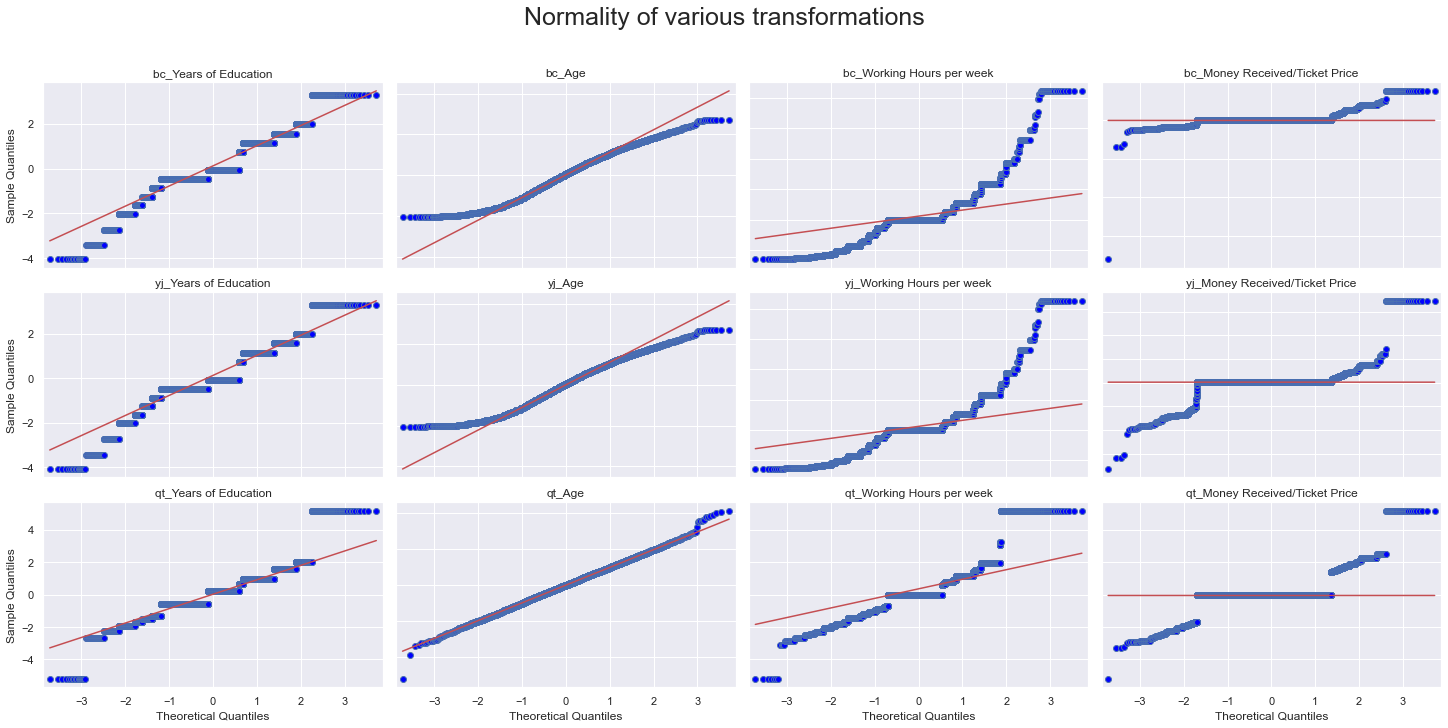

In [93]:
# Plot transformed data_test
sns.set()
fig, axes = plt.subplots(3,4, constrained_layout=True, figsize=(20,10))

fig.suptitle("Normality of various transformations\n", fontsize=25)

for col, ax in zip(trans_df.columns, axes.flatten()):
    x = trans_df.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

The closest the plot is to the red line the 'more normal' the distribution is.

From this plot we could spot some values that could be considered as outliers

In [94]:
data_test['Age'] = trans_df['qt_Age'].copy()
data_test['Years of Education'] = trans_df['yj_Years of Education'].copy()
data_test['Working Hours per week'] = trans_df['qt_Working Hours per week'].copy()
data_test['Money Received/Ticket Price'] = trans_df['bc_Money Received/Ticket Price'].copy()

In [95]:
data_test[metric] = scaler.transform(data_test[metric])

In [96]:
data_test_nan = data_test.replace('?', np.nan).copy()

In [97]:
columns_missing_values = ['Base Area', 'Employment Sector', 'Role']

for column in columns_missing_values:
    data_test_nan[column] = data_test_nan[column].astype('category').copy()
    data_test_nan[f'{column} code']= data_test_nan[column].cat.codes

data_test_nan.replace(-1, np.nan, inplace = True)

In [98]:
data_test_ohc = data_test_nan.drop(columns = ['Base Area', 'Employment Sector', 'Role', 'Base Area code', 'Employment Sector code', 'Role code']).copy()

In [99]:
# Transform 'lives with' into a binary columns where 1: Partner (Wife and Husband); and 0: Other (Alone, Children, Other Family,
# Other relatives)
data_test_ohc['Lives with'] = [1 if l in ['Wife', 'Husband'] else 0 for l in data_test_ohc['Lives with']]

encode = ['Native Continent', 'Marital Status']

df_ohc = data_test_ohc.copy()
ohc_nc_ms = OneHotEncoder(sparse=False)
ohc_feat = ohc_nc_ms.fit_transform(df_ohc[encode])
ohc_feat_names = [x.replace('x0', 'Native Continent').replace('x1', 'Marital Status') for x in ohc_nc_ms.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_test_ohc = pd.concat([data_test_ohc, ohc_df], axis=1)
data_test_ohc.drop(columns = ['Native Continent', 'Marital Status'], inplace = True)

Imputing ? with the xgb fitted on the test class

In [100]:
imputer_xgb = xgb.XGBClassifier(max_depth = 3, n_jobs = -1)

for column in columns_to_impute:
    
    nans_index = data_train_nan_2[f'{column} code'][data_train_nan_2[f'{column} code'].isna()].index
    nans_index_test = data_test_nan[f'{column} code'][data_test_nan[f'{column} code'].isna()].index
    

    X_train =  data_train_ohc_2[data_train_ohc_2.index.map(lambda x: x not in nans_index.to_list())]
    y_train = data_train_nan_2[f'{column} code'][~data_train_nan_2[f'{column} code'].isna()].copy()
    
    X_imp =  data_test_ohc.loc[nans_index_test.to_list(), :]

    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                             shuffle = True, stratify = y_train, random_state = 7)
    
    eval_set = [(X_val, y_val)]
    imputer_xgb.fit(X_train2, y_train2, eval_set=eval_set, eval_metric='merror',early_stopping_rounds=10, verbose = False)
    y_imp = imputer_xgb.predict(X_imp)
    
    
    data_test_nan[f'{column} code'][data_test_nan[f'{column} code'].isna()] = y_imp

In [101]:
#And apply the filling also to the categorical variable
for column in columns_to_impute:
    data_test_nan[column] = data_test_nan[column].cat.categories[data_test_nan[f'{column} code'].astype(int)]

In [102]:
data_test_nan['Role'] = data_test['Role']

In [103]:
data_test_ohc = data_test_ohc.merge(data_test_nan[columns_missing_values], left_index= True, right_index=True).copy()

In [104]:
# Apply binary for base area. Either Northbury or not Northbury
data_test_ohc['Base Area'] = [1 if l in ['Northbury'] else 0 for l in data_test_ohc['Base Area']]

In [105]:
# Apply One Hot Encoder for top 6 'Role' (+ 7 columns).
topRole = data_test_ohc['Role'].isin(topRole_train)
data_test_ohc.loc[~topRole, 'Role'] = "Other"

df_ohc = data_test_ohc.copy()
ohc_feat = ohc_r.transform(df_ohc[['Role']].replace('?', 'Other'))
ohc_feat_names = [x.replace('x0', 'Role') for x in ohc_r.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_test_ohc = pd.concat([data_test_ohc, ohc_df], axis=1)
data_test_ohc.drop(columns = ['Role'], inplace = True)

In [106]:
# Apply One Hot Encoder for top 6 'Employment Sector' (+ 7 columns).
topEmploymentSector = data_test_ohc['Employment Sector'].isin(topEmploymentSector_train)
data_test_ohc.loc[~topEmploymentSector, 'Employment Sector'] = "NotWorking"
data_test_ohc['Employment Sector'].unique()

df_ohc = data_test_ohc.copy()
ohc_feat = ohc_es.transform(df_ohc[['Employment Sector']].replace('?', 'NotWorking'))
ohc_feat_names = [x.replace('x0', 'Employment Sector') for x in ohc_es.get_feature_names()]
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

data_test_ohc = pd.concat([data_test_ohc, ohc_df], axis=1)
data_test_ohc.drop(columns = ['Employment Sector'], inplace = True)

# + 34 total for all the onehotencoder

In [107]:
data_test = data_test_ohc.copy()

## Feature Engineering

In [108]:
data_test['ratio_yearsedu_age'] = data_test['Years of Education'] / data_test['Age']
data_test['ratio_workingh_age'] = data_test['Working Hours per week'] / data_test['Age']
data_test['ratio_workingh_yearsedu'] = data_test['Working Hours per week'] / data_test['Years of Education']
data_test['work_experience'] = data_test['Age'] - data_test['Years of Education']
new_features = ['ratio_yearsedu_age', 'ratio_workingh_age', 'ratio_workingh_yearsedu', 'work_experience']
data_test.replace(np.inf, 0, inplace = True)
data_test[new_features] = scaler.transform(data_test[new_features])

# Looking at the correlation

After we've done all the desirable changes to the dataset and before the model assessment part, we’re going to check the correlation between variables and drop high correlated features.

In [109]:
corr = round(data_train.corr(), 2)

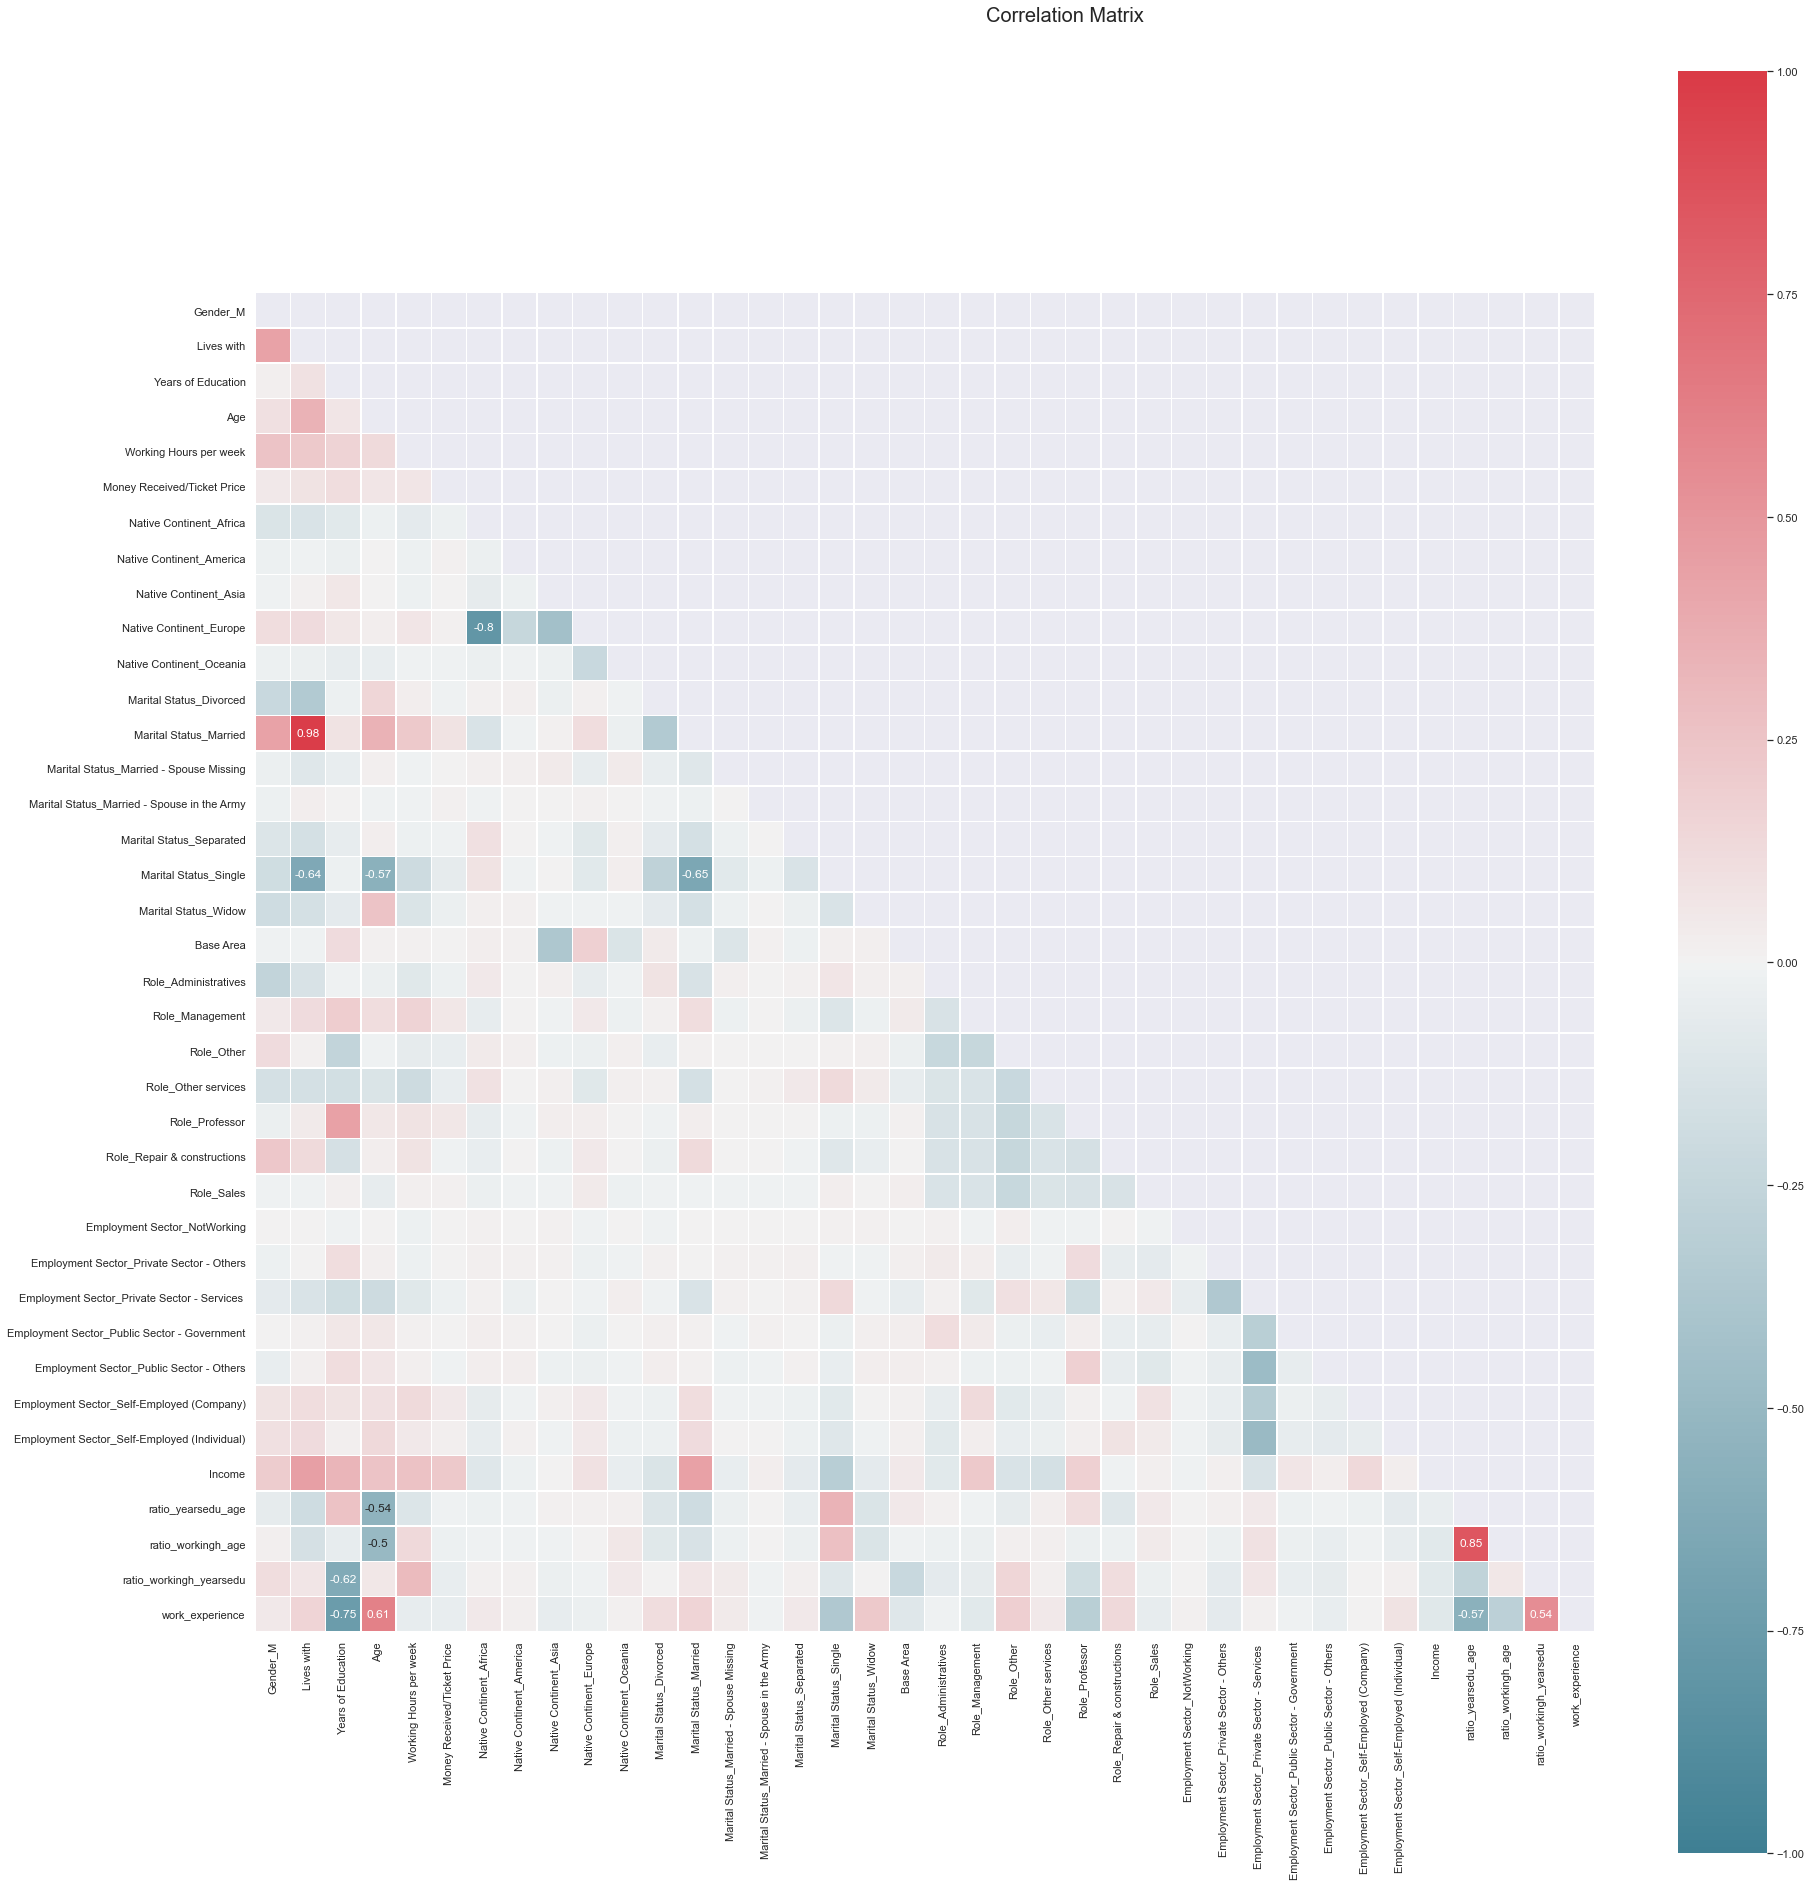

In [110]:
# Prepare figure
fig = plt.figure(figsize=(30, 30))

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

#showing only lower half
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [111]:
def high_corr_val(corr, threshold = 0.6):
    high_corr = []
    rows_cols = corr.index.to_list()
    for i in range(corr.shape[0]):
        if i != 0:
            for j in range(i):
                if abs(corr.iloc[i,j]) >= threshold:
                    high_corr.append((rows_cols[i], rows_cols[j], round(corr.iloc[i,j], 2)))
    return high_corr

‘Lives with’ and ‘Marital Status_Married’ are high correlated (above 0.90) thus we’re dropping the one that has a smaller correlation coefficient with the target value.

In [112]:
pd.DataFrame(high_corr_val(corr, 0.9)).sort_values(2, ascending=False)

,0,1,2
0,Marital Status_Married,Lives with,0.98


In [113]:
corr['Income'][['Lives with', 'Marital Status_Married']]

Lives with                0.45
Marital Status_Married    0.44
Name: Income, dtype: float64

In [114]:
data_train.drop(columns = 'Marital Status_Married', inplace= True)
data_val.drop(columns = 'Marital Status_Married', inplace= True)
data_test.drop(columns = 'Marital Status_Married', inplace= True)

# Preparing the data

Preparing the necessary variables that will help in the model assessment in order to optimize the final accuracy.

In [115]:
X_train = data_train.drop(columns = 'Income').copy()
y_train_col = data_train['Income'].copy()
y_train = np.ravel(np.array(y_train_col))
X_val = data_val.drop(columns = 'Income').copy()
y_val_col = data_val['Income'].copy()
y_val = np.ravel(np.array(y_val_col))
X_test = data_test

We make a distinction between datasets with categorical(now binary) variables and without, beacuse only ccertain models can handle categorical variable, in particular we are going to use it only for tree based models. 

In [116]:
columns = X_train.columns.to_list()
metric_col = ['Years of Education', 'Age', 'Working Hours per week', 'Money Received/Ticket Price', 'ratio_yearsedu_age', 'ratio_workingh_age', 'ratio_workingh_yearsedu', 'work_experience']
binary_col = [col for col in columns if col not in metric_col]

X_train_metric = X_train[metric_col]
X_train_binary = X_train[binary_col]
X_val_metric = X_val[metric_col]
X_val_binary = X_val[binary_col]
X_test_metric = X_test[metric_col]
X_test_binary = X_test[binary_col]

# Preparing functions for model Selection and  Assessment

Based on the results returned by these functions, we’re able to compare the performance on classifying unseen data and obtain the best model.

In [117]:
def avg_score(model_X, splits = 10):
    # apply kfold
    model = model_X[0]
    X = pd.DataFrame(model_X[1])
    y = pd.DataFrame(model_X[2])
    kf = KFold(n_splits=splits)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    f1score_train = []
    f1score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        #create predictions and check f1score
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        value_f1score_train = f1_score(y_train, pred_train, average = 'micro')
        value_f1score_test = f1_score(y_test, pred_test, average = 'micro')
        f1score_train.append(value_f1score_train)
        f1score_test.append(value_f1score_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    avg_f1score_train = round(np.mean(f1score_train),3)
    avg_f1score_test = round(np.mean(f1score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    std_f1score_train = round(np.std(f1score_train),2)
    std_f1score_test = round(np.std(f1score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_f1score_train) + '+/-' + str(std_f1score_train),\
str(avg_f1score_test) + '+/-' + str(std_f1score_test)

In [118]:
def show_results(df, splits = 10, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, f1score_train, f1score_val = avg_score(arg, splits)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, f1score_train, f1score_val
        count+=1
    return df

In [119]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print(f1_score(y_true = y_train, y_pred = pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print(f1_score(y_true = y_val, y_pred = pred_val, average = 'micro'))

In [120]:
def eval_model(model, X_train, X_val, y_train = y_train, y_val = y_val, probability = True, splits = 10):
    print(show_results(df_results, splits, (model, X_train, y_train)), '\n')
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    metrics(y_train, pred_train, y_val, pred_val)
    if probability:
        prob_model = model.predict_proba(X_val)
        fpr, tpr, thresholds = roc_curve(y_val, prob_model[:, 1])
        plt.plot(fpr, tpr,label="ROC Curve model")
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
        plt.show()
        print('ROC AUC score:', roc_auc_score(y_val, prob_model[:, 1]))

In [121]:
def get_models(model, parameter, range_):
    models = dict()
    for i in range_:
        model_ = clone(model)
        models[str(i)] = model_.set_params(**{parameter : i})
    return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def param_tunning(model, parameter, range_, X_train, y_train):
    X, y = X_train, y_train
    models = get_models(model, parameter, range_)
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    plt.boxplot(results, labels=names, showmeans=True)
    plt.show()

In [122]:
df_results = pd.DataFrame(columns = ['Time', 'Train', 'Validation', 'f1score train', 'f1score validation'], index = [0])
y = y_train

# Model Selection

Lastly, and after performing all the relevant transformation to the raw dataset, we are ready to test different classification algorithms, select the most relevant features and find the parameters that maximize the accuracy of the predictions.

With the constraint of only using sklearn models for the classification, several algorithms were used, namely: Logistic Regression, Gaussian Naïve Baise, Random Forest, Gradient boosting, Support Vector Machine Classifier, Neural Networks, K-Nearest-Neighbors and Decision Tree Classifier.

Moreover, for the most promising algorithms, several parameters are tested, not with any tunning function like Grid Search CV yet, to assess the potential of the algorithm in classifying the income of each person.

**We commented out all the cells for parameter tuning and feature selection that had a long runtime.**

## Logistic Regression

          Time        Train    Validation f1score train f1score validation
0  0.07+/-0.01  0.804+/-0.0  0.804+/-0.01   0.804+/-0.0       0.804+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     11614
           1       0.67      0.32      0.44      3535

    accuracy                           0.80     15149
   macro avg       0.74      0.64      0.66     15149
weighted avg       0.79      0.80      0.78     15149

[[11041   573]
 [ 2393  1142]]
0.804211499108852
___________________________________________________________________________________________________________
                                        

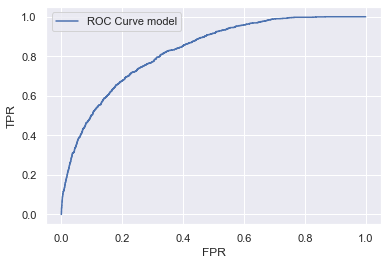

ROC AUC score: 0.8270980432715831


In [123]:
model = LogisticRegression(random_state=7)
eval_model(model, X_train_metric, X_val_metric, y_train, y_val)

           Time        Train    Validation f1score train f1score validation
0  0.049+/-0.01  0.735+/-0.0  0.735+/-0.01   0.735+/-0.0       0.735+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     11614
           1       0.46      0.74      0.56      3535

    accuracy                           0.73     15149
   macro avg       0.68      0.74      0.69     15149
weighted avg       0.80      0.73      0.75     15149

[[8530 3084]
 [ 934 2601]]
0.7347679714832662
___________________________________________________________________________________________________________
                                         

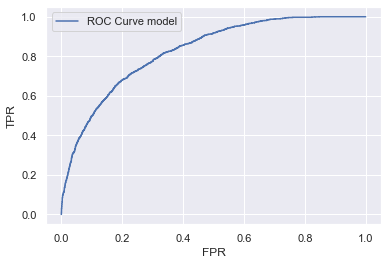

ROC AUC score: 0.8264709938249751


In [124]:
model = LogisticRegression(class_weight='balanced', random_state=7)
eval_model(model, X_train_metric, X_val_metric, y_train, y_val)

In [125]:
model = LogisticRegression(random_state=7)
model.fit(X_train, y_train)
pred_proba_df = pd.DataFrame(model.predict_proba(X_val))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_val_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = f1_score(y_true = y_val, y_pred = y_val_pred[1], average = 'micro')
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_val, y_val_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.5855536731865085
[[2310 2668]
 [  23 1492]]

******** For i = 0.1 ******
Our testing accuracy is 0.6875096257508085
[[3029 1949]
 [  80 1435]]

******** For i = 0.15 ******
Our testing accuracy is 0.729862929308486
[[3363 1615]
 [ 139 1376]]

******** For i = 0.2 ******
Our testing accuracy is 0.7659017403357461
[[3655 1323]
 [ 197 1318]]

******** For i = 0.25 ******
Our testing accuracy is 0.7939319266902819
[[3926 1052]
 [ 286 1229]]

******** For i = 0.3 ******
Our testing accuracy is 0.8171877406437701
[[4162  816]
 [ 371 1144]]

******** For i = 0.35 ******
Our testing accuracy is 0.8292006776528569
[[4340  638]
 [ 471 1044]]

******** For i = 0.4 ******
Our testing accuracy is 0.8322809179115971
[[4470  508]
 [ 581  934]]

******** For i = 0.45 ******
Our testing accuracy is 0.8409055906360696
[[4593  385]
 [ 648  867]]

******** For i = 0.5 ******
Our testing accuracy is 0.8390574464808255
[[4660  318]
 [ 727  788]]

*****

In [126]:
model = LogisticRegression(random_state=7)
model.fit(X_train, y_train)
y_train_pred = pd.DataFrame(model.predict_proba(X_train)).applymap(lambda x: 1 if x>0.45 else 0)
y_val_pred = pd.DataFrame(model.predict_proba(X_val)).applymap(lambda x: 1 if x>0.45 else 0)
logisic_test_acc = f1_score(y_true = y_train, y_pred = y_train_pred[1], average = 'micro')
logisic_val_acc = f1_score(y_true = y_val, y_pred = y_val_pred[1], average = 'micro')

## Gaussian Naive Bayes

          Time         Train   Validation f1score train f1score validation
0  0.003+/-0.0  0.769+/-0.01  0.77+/-0.01  0.769+/-0.01        0.77+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     11614
           1       0.49      0.67      0.57      3535

    accuracy                           0.76     15149
   macro avg       0.69      0.73      0.70     15149
weighted avg       0.80      0.76      0.77     15149

[[9181 2433]
 [1162 2373]]
0.7626906066407024
___________________________________________________________________________________________________________
                                           

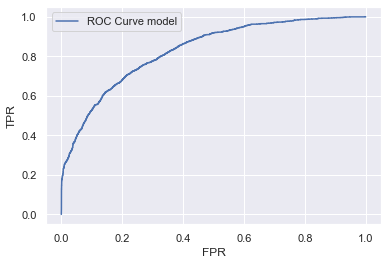

ROC AUC score: 0.8299588154878165


In [127]:
model = GaussianNB()
eval_model(model, X_train_metric, X_val_metric, y_train, y_val)

>0.1 0.749 (0.016)
>0.2 0.764 (0.016)
>0.30000000000000004 0.783 (0.012)
>0.4 0.790 (0.011)
>0.5 0.794 (0.011)
>0.6 0.798 (0.011)
>0.7000000000000001 0.801 (0.008)
>0.8 0.803 (0.007)
>0.9 0.801 (0.008)
>1.0 0.797 (0.005)


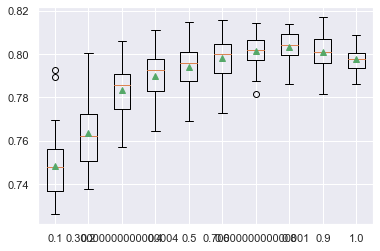

In [128]:
# model = GaussianNB()
# param_tunning(model, 'var_smoothing', np.arange(0.1,1.1,0.1), X_train_metric, y_train)

          Time        Train    Validation f1score train f1score validation
0  0.003+/-0.0  0.794+/-0.0  0.793+/-0.01   0.794+/-0.0       0.793+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     11614
           1       0.56      0.50      0.53      3535

    accuracy                           0.79     15149
   macro avg       0.71      0.69      0.70     15149
weighted avg       0.78      0.79      0.79     15149

[[10228  1386]
 [ 1775  1760]]
0.7913393623341475
___________________________________________________________________________________________________________
                                       

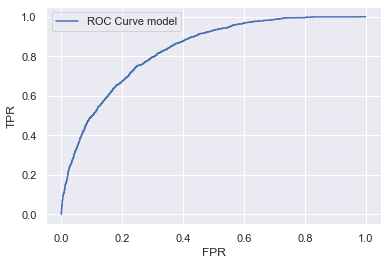

ROC AUC score: 0.831563897651316


In [129]:
model = GaussianNB(var_smoothing = 0.5)
eval_model(model, X_train_metric, X_val_metric, y_train, y_val)
y_train_pred = model.predict(X_train_metric)
gnb_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_metric)
gnb_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Random Forest

           Time      Train    Validation f1score train f1score validation
0  1.382+/-0.03  1.0+/-0.0  0.848+/-0.01     1.0+/-0.0       0.848+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11614
           1       0.98      0.96      0.97      3535

    accuracy                           0.98     15149
   macro avg       0.98      0.97      0.98     15149
weighted avg       0.98      0.98      0.98     15149

[[11529    85]
 [  153  3382]]
0.9842893920390785
___________________________________________________________________________________________________________
                                         

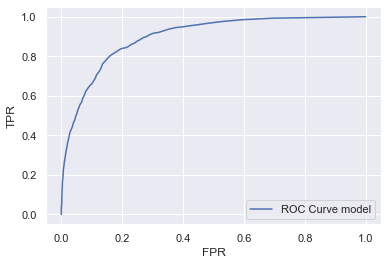

ROC AUC score: 0.8976861888679828


In [130]:
model = RandomForestClassifier(random_state=7)
eval_model(model, X_train, X_val)

### Number of trees

>100 0.848 (0.009)
>200 0.848 (0.007)
>300 0.848 (0.008)
>400 0.848 (0.008)
>500 0.848 (0.008)


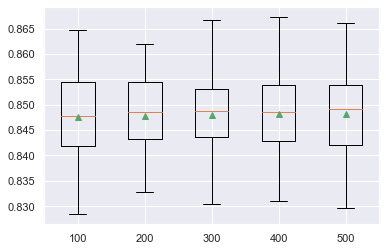

In [131]:
# model = RandomForestClassifier(random_state = 7)
# param_tunning(model, 'n_estimators', [100, 200, 300, 400, 500], X_train, y_train)

### Number of samples

>0.1 0.857 (0.009)
>0.2 0.857 (0.008)
>0.30000000000000004 0.856 (0.007)
>0.4 0.854 (0.008)
>0.5 0.854 (0.008)
>0.6 0.852 (0.008)
>0.7000000000000001 0.851 (0.008)
>0.8 0.849 (0.008)
>0.9 0.849 (0.008)
>1.0 nan (nan)


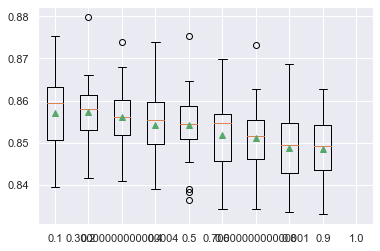

In [132]:
# model = RandomForestClassifier(random_state=7)
# param_tunning(model, 'max_samples', np.arange(0.1, 1.1, 0.1), X_train, y_train)

### Samples split

>10 0.856 (0.008)
>50 0.859 (0.009)
>100 0.859 (0.009)
>150 0.859 (0.008)
>200 0.858 (0.008)


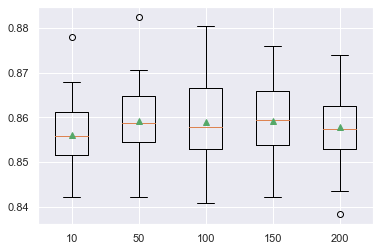

In [133]:
# model = RandomForestClassifier(random_state=7)
# param_tunning(model, 'min_samples_split', [10, 50, 100, 150, 200], X_train, y_train)

### Tree depth

>1 0.767 (0.000)
>2 0.788 (0.003)
>3 0.823 (0.006)
>4 0.845 (0.007)
>5 0.849 (0.009)
>6 0.851 (0.009)
>7 0.853 (0.008)
>8 0.856 (0.009)
>9 0.858 (0.008)
>10 0.858 (0.008)
>11 0.861 (0.009)
>12 0.860 (0.008)
>13 0.861 (0.008)
>14 0.860 (0.009)
>15 0.859 (0.008)
>16 0.859 (0.008)
>17 0.858 (0.008)
>18 0.856 (0.008)
>19 0.855 (0.009)
>20 0.855 (0.008)


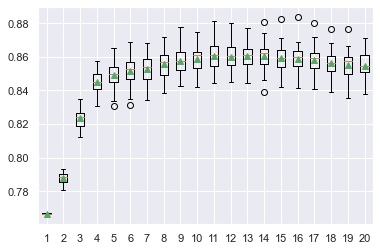

In [134]:
# model = RandomForestClassifier(random_state=7)
# param_tunning(model, 'max_depth', range(1,21), X_train, y_train)

>gini 0.848 (0.009)
>entropy 0.847 (0.008)


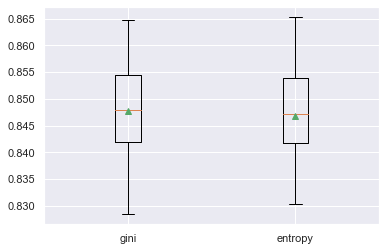

In [135]:
# model = RandomForestClassifier(random_state=7)
# param_tunning(model, 'criterion', ['gini', 'entropy'], X_train, y_train)

>balanced 0.847 (0.007)
>None 0.848 (0.009)


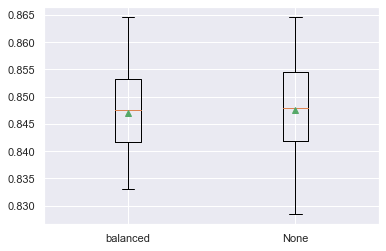

In [136]:
# model = RandomForestClassifier(random_state=7)
# param_tunning(model, 'class_weight', ['balanced', None], X_train, y_train)

           Time        Train    Validation f1score train f1score validation
0  1.178+/-0.04  0.863+/-0.0  0.857+/-0.01   0.863+/-0.0       0.857+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11614
           1       0.78      0.56      0.65      3535

    accuracy                           0.86     15149
   macro avg       0.83      0.76      0.78     15149
weighted avg       0.86      0.86      0.85     15149

[[11071   543]
 [ 1559  1976]]
0.8612449666644663
___________________________________________________________________________________________________________
                                     

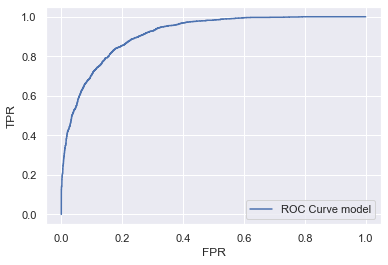

ROC AUC score: 0.9127767457340351


In [137]:
model = RandomForestClassifier(random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1)
eval_model(model, X_train, X_val)
y_train_pred = model.predict(X_train)
rf_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val)
rf_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Gradient Boosting

           Time        Train    Validation f1score train f1score validation
0  2.388+/-0.04  0.872+/-0.0  0.865+/-0.01   0.872+/-0.0       0.865+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11614
           1       0.80      0.60      0.68      3535

    accuracy                           0.87     15149
   macro avg       0.84      0.78      0.80     15149
weighted avg       0.87      0.87      0.86     15149

[[11082   532]
 [ 1428  2107]]
0.870618522674764
___________________________________________________________________________________________________________
                                      

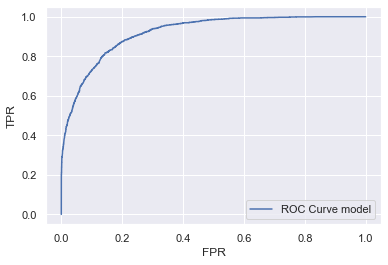

ROC AUC score: 0.9201534275564961


In [138]:
model = GradientBoostingClassifier(random_state = 7)
eval_model(model, X_train, X_val)

### Number of trees

>100 0.864 (0.009)
>200 0.867 (0.009)
>300 0.867 (0.009)
>400 0.866 (0.009)
>500 0.866 (0.008)


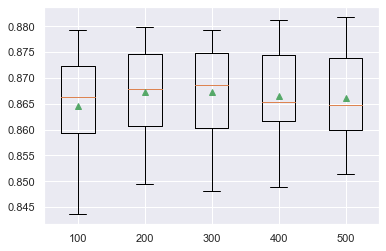

In [139]:
# model = GradientBoostingClassifier(random_state=7)
# param_tunning(model, 'n_estimators', [100, 200, 300, 400, 500], X_train, y_train)

### Fraction of samples

>0.1 0.860 (0.009)
>0.2 0.861 (0.008)
>0.30000000000000004 0.863 (0.008)
>0.4 0.863 (0.008)
>0.5 0.864 (0.009)
>0.6 0.864 (0.009)
>0.7000000000000001 0.865 (0.009)
>0.8 0.864 (0.009)
>0.9 0.864 (0.009)
>1.0 0.864 (0.009)


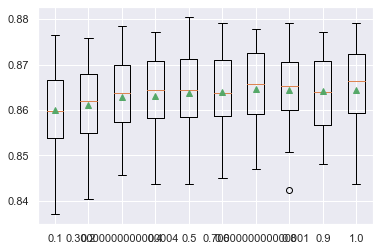

In [140]:
# model = GradientBoostingClassifier(random_state=7)
# param_tunning(model, 'subsample', np.arange(0.1, 1.1, 0.1), X_train, y_train)

### Learning rate

>0.1 0.864 (0.009)
>0.2 0.868 (0.009)
>0.30000000000000004 0.868 (0.009)
>0.4 0.866 (0.009)
>0.5 0.864 (0.009)
>0.6 0.861 (0.008)
>0.7000000000000001 0.859 (0.008)
>0.8 0.858 (0.010)
>0.9 0.856 (0.007)
>1.0 0.853 (0.008)


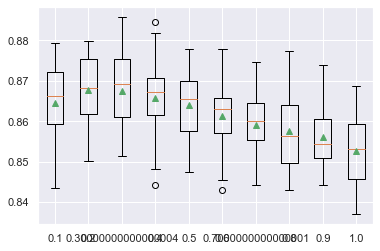

In [141]:
# model = GradientBoostingClassifier(random_state=7)
# param_tunning(model, 'learning_rate', np.arange(0.1, 1.1, 0.1), X_train, y_train)

### Tree depth

>1 0.855 (0.007)
>2 0.859 (0.009)
>3 0.864 (0.009)
>4 0.868 (0.009)
>5 0.868 (0.009)
>6 0.867 (0.008)
>7 0.867 (0.009)
>8 0.865 (0.008)
>9 0.864 (0.009)
>10 0.862 (0.007)


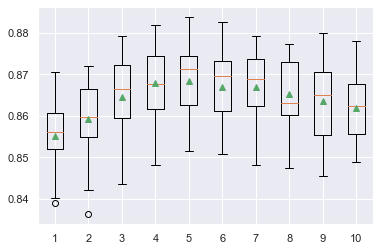

In [142]:
# model = GradientBoostingClassifier(random_state=7)
# param_tunning(model, 'max_depth', range(1,11), X_train, y_train)

### Minimum samples split

>2 0.864 (0.009)
>5 0.864 (0.009)
>10 0.865 (0.010)
>50 0.864 (0.009)
>100 0.865 (0.009)
>150 0.865 (0.009)
>200 0.864 (0.009)


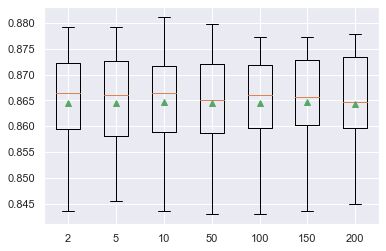

In [143]:
# model = GradientBoostingClassifier(random_state=7)
# param_tunning(model, 'min_samples_split', [2, 5, 10, 50, 100, 150, 200], X_train, y_train)

           Time        Train    Validation f1score train f1score validation
0  6.068+/-0.09  0.893+/-0.0  0.869+/-0.01   0.893+/-0.0       0.869+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11614
           1       0.82      0.68      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.82      0.84     15149
weighted avg       0.89      0.89      0.89     15149

[[11095   519]
 [ 1138  2397]]
0.8906198428939204
___________________________________________________________________________________________________________
                                     

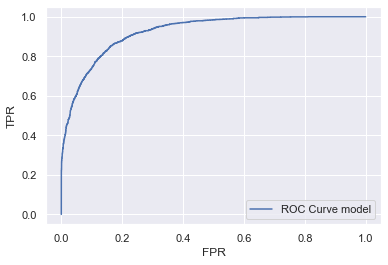

ROC AUC score: 0.9239771164742028


In [144]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train, X_val)
y_train_pred = model.predict(X_train)
gb_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val)
gb_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Support Vector Machine Classifier

            Time        Train    Validation f1score train f1score validation
0  17.203+/-0.21  0.815+/-0.0  0.814+/-0.01   0.815+/-0.0       0.814+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11614
           1       0.75      0.31      0.44      3535

    accuracy                           0.82     15149
   macro avg       0.79      0.64      0.67     15149
weighted avg       0.81      0.82      0.78     15149

[[11248   366]
 [ 2430  1105]]
0.8154333619380817
___________________________________________________________________________________________________________
                                   

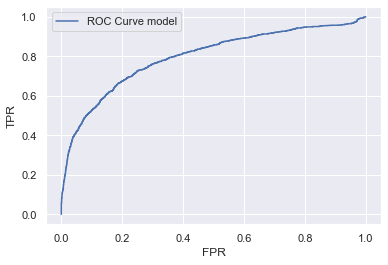

ROC AUC score: 0.7969299240088734


In [145]:
model = SVC(random_state = 7, probability=True)
eval_model(model, X_train_metric, X_val_metric)

>0.1 0.803 (0.006)
>1 0.815 (0.006)
>10 0.819 (0.006)
>100 0.822 (0.006)


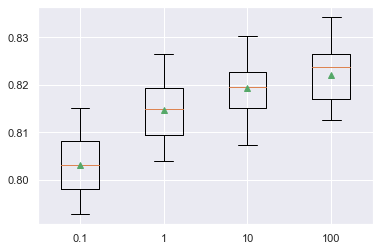

In [148]:
# model = SVC(random_state = 7, probability=True)
# param_tunning(model, 'C', [0.1, 1, 10, 100], X_train_metric, y_train)

>linear 0.801 (0.004)
>rbf 0.815 (0.006)
>sigmoid 0.767 (0.000)


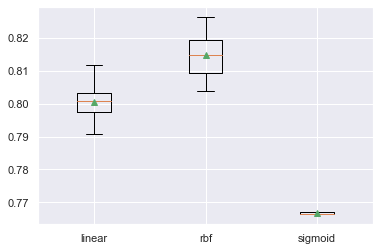

In [149]:
# model = SVC(random_state = 7, probability=True)
# param_tunning(model, 'kernel', ['linear', 'rbf', 'sigmoid'], X_train_metric, y_train)

            Time        Train    Validation f1score train f1score validation
0  48.837+/-1.56  0.824+/-0.0  0.822+/-0.01   0.824+/-0.0       0.822+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     11614
           1       0.78      0.35      0.48      3535

    accuracy                           0.82     15149
   macro avg       0.80      0.66      0.69     15149
weighted avg       0.82      0.82      0.80     15149

[[11254   360]
 [ 2295  1240]]
0.8247409069905605
___________________________________________________________________________________________________________
                                   

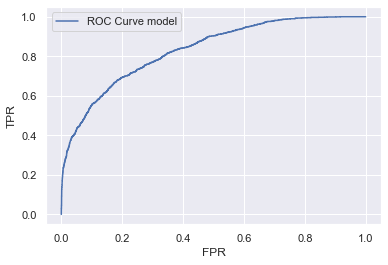

ROC AUC score: 0.831731367190556


In [150]:
model = SVC(random_state = 7, probability=True, C = 100, kernel = 'rbf')
eval_model(model, X_train_metric, X_val_metric)
y_train_pred = model.predict(X_train_metric)
svc_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_metric)
svc_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Neural Network

            Time        Train    Validation f1score train f1score validation
0  11.386+/-1.39  0.811+/-0.0  0.809+/-0.01   0.811+/-0.0       0.809+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11614
           1       0.66      0.43      0.52      3535

    accuracy                           0.81     15149
   macro avg       0.75      0.68      0.70     15149
weighted avg       0.80      0.81      0.80     15149

[[10825   789]
 [ 2030  1505]]
0.8139151099082448
___________________________________________________________________________________________________________
                                   

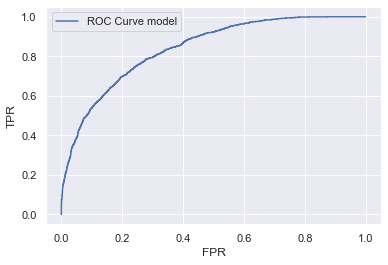

ROC AUC score: 0.8390684689200139


In [151]:
model = MLPClassifier(random_state = 7)
eval_model(model, X_train_metric, X_val_metric)
y_train_pred = model.predict(X_train_metric)
mlp_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_metric)
mlp_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

>1 0.796 (0.008)
>(1, 1) 0.767 (0.000)
>(1, 1, 1) 0.800 (0.009)


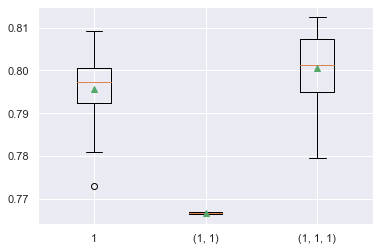

In [152]:
# model = MLPClassifier(random_state = 7, max_iter = 1000)
# param_tunning(model, 'hidden_layer_sizes', [(1), (1, 1), (1, 1, 1)], X_train_metric, y_train)

>1 0.796 (0.008)
>10 0.805 (0.009)
>100 0.808 (0.008)


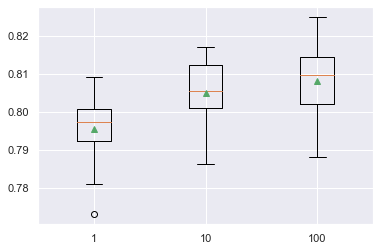

In [153]:
# model = MLPClassifier(random_state = 7, max_iter = 1000)
# param_tunning(model, 'hidden_layer_sizes', [(1), (10), (100)], X_train_metric, y_train)

>(10, 10) 0.806 (0.007)
>(10, 10, 10) 0.806 (0.008)
>100 0.808 (0.008)
>(50, 50) 0.817 (0.011)
>(30, 30, 30) 0.820 (0.011)
>(100, 100) 0.820 (0.010)
>(100, 100, 100) 0.823 (0.008)


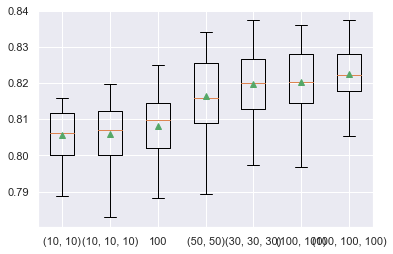

In [154]:
# model = MLPClassifier(random_state = 7, max_iter = 1000)
# param_tunning(model, 'hidden_layer_sizes', [(10,10), (10,10,10), (100), (50,50), (30, 30, 30), (100, 100), (100, 100, 100)], X_train_metric, y_train)

>identity 0.807 (0.006)
>logistic 0.799 (0.008)
>tanh 0.808 (0.006)
>relu 0.808 (0.008)


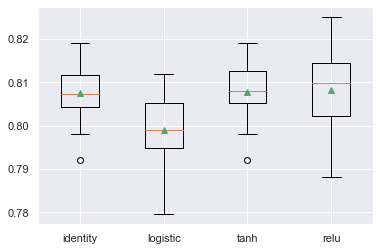

In [155]:
# model = MLPClassifier(random_state = 7, max_iter = 1000)
# param_tunning(model, 'activation', ['identity', 'logistic', 'tanh', 'relu'], X_train_metric, y_train)

In [159]:
# model = MLPClassifier(random_state = 7, max_iter = 1000)
# param_tunning(model, 'solver', ['lbfgs', 'sgd', 'adam'], X_train_metric, y_train)

           Time        Train    Validation f1score train f1score validation
0  9.962+/-0.33  0.818+/-0.0  0.815+/-0.01   0.818+/-0.0       0.815+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11614
           1       0.67      0.39      0.49      3535

    accuracy                           0.81     15149
   macro avg       0.75      0.66      0.69     15149
weighted avg       0.80      0.81      0.79     15149

[[10934   680]
 [ 2168  1367]]
0.8120007921314938
___________________________________________________________________________________________________________
                                     

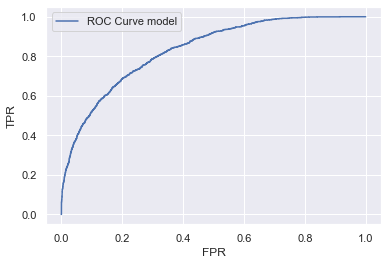

ROC AUC score: 0.8324375768231704


In [160]:
model = MLPClassifier(random_state = 7, solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (30,30,30))
eval_model(model, X_train_metric, X_val_metric)

## K-Nearest-Neighbors

           Time        Train    Validation f1score train f1score validation
0  0.039+/-0.01  0.857+/-0.0  0.801+/-0.01   0.857+/-0.0       0.801+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     11614
           1       0.74      0.56      0.64      3535

    accuracy                           0.85     15149
   macro avg       0.81      0.75      0.77     15149
weighted avg       0.84      0.85      0.84     15149

[[10932   682]
 [ 1571  1964]]
0.8512773120337976
___________________________________________________________________________________________________________
                                     

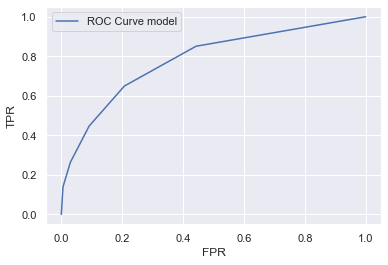

ROC AUC score: 0.7829889798943734


In [161]:
model = KNeighborsClassifier()
eval_model(model, X_train_metric, X_val_metric)

>100 0.809 (0.006)
>120 0.808 (0.007)
>140 0.808 (0.007)
>160 0.808 (0.006)
>180 0.805 (0.006)
>200 0.805 (0.007)
>220 0.805 (0.006)
>240 0.804 (0.007)
>260 0.805 (0.007)
>280 0.804 (0.007)
>300 0.803 (0.007)


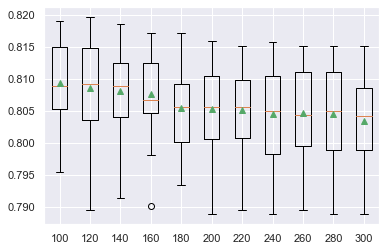

In [162]:
# model = KNeighborsClassifier()
# param_tunning(model, 'n_neighbors', range(100,310,20), X_train_metric, y_train)

           Time        Train   Validation f1score train f1score validation
0  0.039+/-0.01  0.813+/-0.0  0.81+/-0.01   0.813+/-0.0        0.81+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11614
           1       0.70      0.36      0.47      3535

    accuracy                           0.81     15149
   macro avg       0.76      0.66      0.68     15149
weighted avg       0.80      0.81      0.79     15149

[[11073   541]
 [ 2274  1261]]
0.8141791537395208
___________________________________________________________________________________________________________
                                       

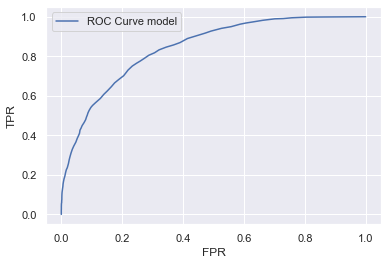

ROC AUC score: 0.8421333736427077


In [163]:
model = KNeighborsClassifier(n_neighbors=100)
eval_model(model, X_train_metric, X_val_metric)
y_train_pred = model.predict(X_train_metric)
kn_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_metric)
kn_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Decision Tree Classifier

          Time        Train    Validation f1score train f1score validation
0  0.079+/-0.0  0.995+/-0.0  0.774+/-0.01   0.995+/-0.0       0.774+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11614
           1       0.95      0.94      0.94      3535

    accuracy                           0.97     15149
   macro avg       0.96      0.96      0.96     15149
weighted avg       0.97      0.97      0.97     15149

[[11431   183]
 [  229  3306]]
0.9728034853785729
___________________________________________________________________________________________________________
                                       

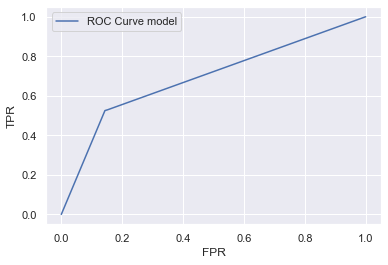

ROC AUC score: 0.6905985013929276


In [164]:
model = DecisionTreeClassifier(random_state = 7)
eval_model(model, X_train_metric, X_val_metric)

>gini 0.814 (0.013)
>entropy 0.816 (0.010)


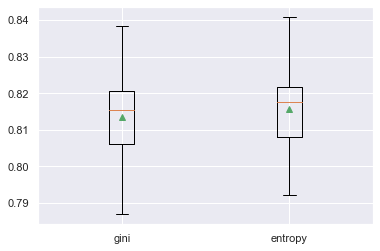

In [165]:
# model = DecisionTreeClassifier(random_state = 7)
# param_tunning(model, 'criterion', ['gini', 'entropy'], X_train, y_train)

>1 0.767 (0.000)
>2 0.831 (0.008)
>3 0.845 (0.009)
>4 0.849 (0.008)
>5 0.855 (0.008)
>6 0.856 (0.007)
>7 0.855 (0.008)
>8 0.854 (0.008)
>9 0.853 (0.008)
>10 0.849 (0.010)


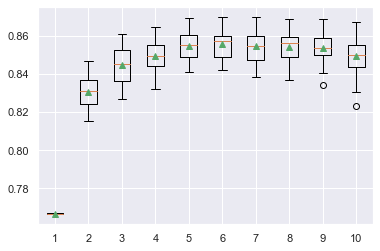

In [166]:
# model = DecisionTreeClassifier(random_state = 7)
# param_tunning(model, 'max_depth', range(1,11), X_train, y_train)

>balanced 0.815 (0.011)
>None 0.814 (0.013)


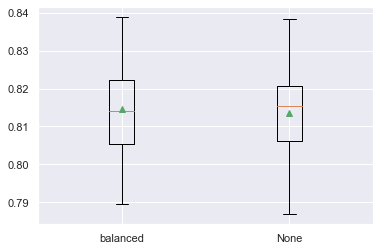

In [167]:
# model = DecisionTreeClassifier(random_state = 7)
# param_tunning(model, 'class_weight', ['balanced', None], X_train, y_train)

>100 0.850 (0.009)
>150 0.852 (0.010)
>200 0.853 (0.009)
>250 0.853 (0.009)
>300 0.855 (0.008)
>350 0.856 (0.008)
>400 0.855 (0.008)
>450 0.855 (0.008)
>500 0.855 (0.008)
>550 0.855 (0.008)
>600 0.855 (0.009)
>650 0.855 (0.008)
>700 0.855 (0.008)
>750 0.855 (0.008)


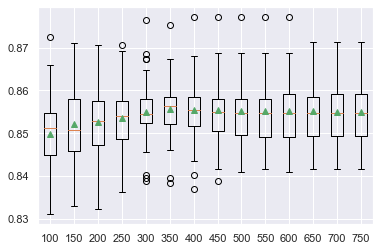

In [168]:
# model = DecisionTreeClassifier(random_state = 7)
# param_tunning(model, 'min_samples_split', range(100,755,50), X_train, y_train)

          Time        Train    Validation f1score train f1score validation
0  0.063+/-0.0  0.856+/-0.0  0.852+/-0.01   0.856+/-0.0       0.852+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11614
           1       0.80      0.50      0.62      3535

    accuracy                           0.86     15149
   macro avg       0.83      0.73      0.76     15149
weighted avg       0.85      0.86      0.84     15149

[[11178   436]
 [ 1760  1775]]
0.8550399366294805
___________________________________________________________________________________________________________
                                       

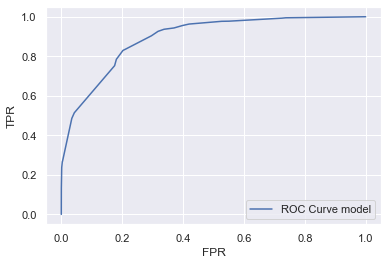

ROC AUC score: 0.8926342573992232


In [169]:
model = DecisionTreeClassifier(random_state = 7, min_samples_split = 350, criterion = 'entropy', max_depth = 6)
eval_model(model, X_train, X_val)
y_train_pred = model.predict(X_train)
dtc_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val)
dtc_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Final model selection

After testing the capabilities of each algorithm in classifying unseen data, we compare all the results and select the model that will be used on further tunning to be used in the final prediction.

In [170]:
def compare_auc(models):
    
    for model, model_name, only_metric in models:
        if only_metric:
            model.fit(X_train_metric, y_train)
            prob_model = model.predict_proba(X_val_metric)
            pred = model.predict(X_val_metric)
        else:
            model.fit(X_train, y_train)
            prob_model = model.predict_proba(X_val)
            pred = model.predict(X_val)
        
        fpr, tpr, thresholds_DT = roc_curve(y_val, prob_model[:, 1])
        auc = roc_auc_score(y_val, pred)
        plt.plot(fpr, tpr,label= f'{model_name} {round(auc, 2)}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

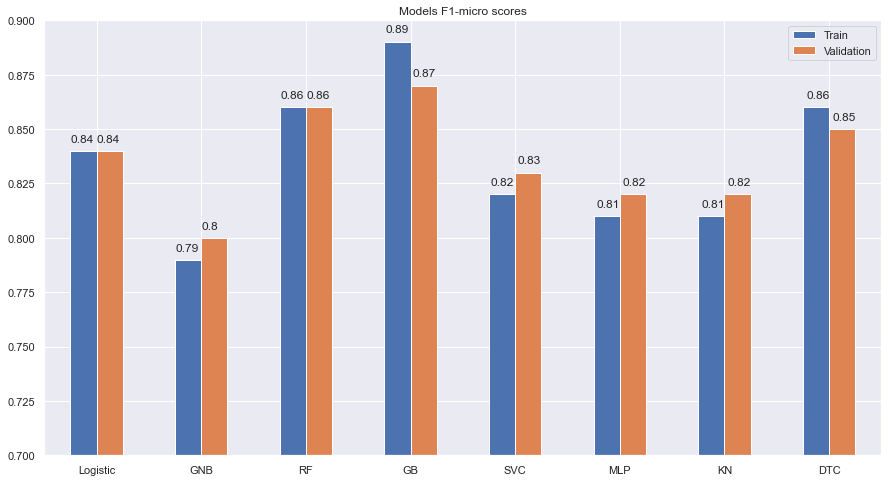

In [171]:
train_acc = np.round([logisic_test_acc, gnb_test_acc,rf_test_acc,gb_test_acc,svc_test_acc,mlp_test_acc,kn_test_acc,dtc_test_acc],2)
val_acc = np.round([logisic_val_acc, gnb_val_acc,rf_val_acc,gb_val_acc,svc_val_acc,mlp_val_acc,kn_val_acc,dtc_val_acc],2)
models = ['Logistic','GNB', 'RF', 'GB', 'SVC', 'MLP', 'KN', 'DTC']
df = pd.DataFrame({'Train': train_acc,
                   'Validation': val_acc}, index=models)
ax = df.plot.bar(rot=0, figsize=(15,8) ,  ylim =(0.7,0.9), title = 'Models F1-micro scores')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

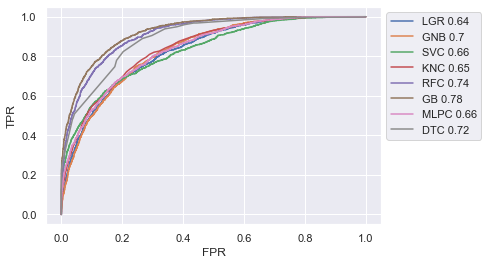

In [176]:
compare_auc([(LogisticRegression(), 'LGR', True),
             (GaussianNB(var_smoothing = 0.5), 'GNB', True),
             (SVC(random_state = 7, probability=True, C = 100, kernel = 'rbf'), 'SVC', True),
             (KNeighborsClassifier(n_neighbors=100),'KNC', True),
             (RandomForestClassifier(random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1),  'RFC', False),
             (GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200),  'GB', False),
             (MLPClassifier(random_state = 7, solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (30,30,30)), 'MLPC', True),
             (DecisionTreeClassifier(random_state = 7, min_samples_split = 350, criterion = 'entropy', max_depth = 6), 'DTC', False)])

Gradient Boosting is the best model.

# Feature Selection using wrapper and embedded methods

Even though all the desired transformation were applied to the data, there is still some filtration that could improve our results. In Machine Learning, the feature selection process is used with the intent of reducing the number of variables, preserving only the ones that are useful to the model to predict the target variable. This step is particularly important, since feature selection is used to reduce the complexity of the model and therefore makes it easier to interpret it, reduce the training time, enhancing generalization by reducing overfitting and reducing variable redundancy.

In [173]:
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [174]:
feature_selection = pd.DataFrame(index = X_train.columns)

## Boruta

Boruta is an all relevant feature selection method, while most other are minimal optimal. In Boruta features are not compared between themselves, but with a randomized version of them, where another dataframe is created by randomly shuffling each feature, and then a model is fitted to get the importance of each feature. The idea is that a feature is useful only if it’s capable of doing better than the best randomized feature, performing this evaluation on several iterations. If a feature can’t perform better than the randomized feature set for n consecutive iterations, the feature will be discarded. After a set number of iterations, or if all the features have been either confirmed or discarded, the algorithm stops, presenting features in a green area (accepted), blue area (possibly relevant) and red are (rejected).

In [177]:
forest = RandomForestClassifier(n_estimators=200, max_depth=5)
boruta = BorutaPy(forest, random_state=7)

boruta.fit(X_train.values, y_train_col.values)

X_filtered = boruta.transform(X_train.values)

green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('\n')

features in the green area: ['Gender_M', 'Lives with', 'Years of Education', 'Age', 'Working Hours per week', 'Money Received/Ticket Price', 'Marital Status_Divorced', 'Marital Status_Single', 'Role_Management', 'Role_Other', 'Role_Other services', 'Role_Professor', 'Employment Sector_Private Sector - Services ', 'Employment Sector_Self-Employed (Company)', 'ratio_yearsedu_age', 'ratio_workingh_age', 'ratio_workingh_yearsedu', 'work_experience']
features in the blue area: []




In [178]:
feature_selection['boruta'] = list(map(lambda x: 1 if x in green_area else 0, feature_selection.index.to_list()))

           Time        Train    Validation f1score train f1score validation
0  5.325+/-0.03  0.892+/-0.0  0.869+/-0.01   0.892+/-0.0       0.869+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.88      0.89      0.88     15149

[[11095   519]
 [ 1176  2359]]
0.8881114264967984
___________________________________________________________________________________________________________
                                     

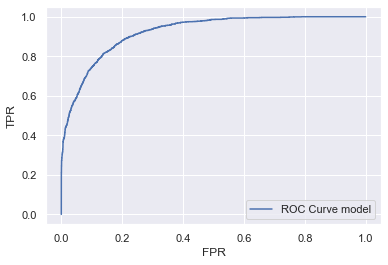

ROC AUC score: 0.9227641225351946


In [179]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train[green_area], X_val[green_area])
y_train_pred = model.predict(X_train[green_area])
boruta_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val[green_area])
boruta_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Random Forest importance

Random forest importance selects the most important features by computing both the entropy and gini coefficient, that gives an insight about the impurity and therefore explain the information gain, with a random classifier.

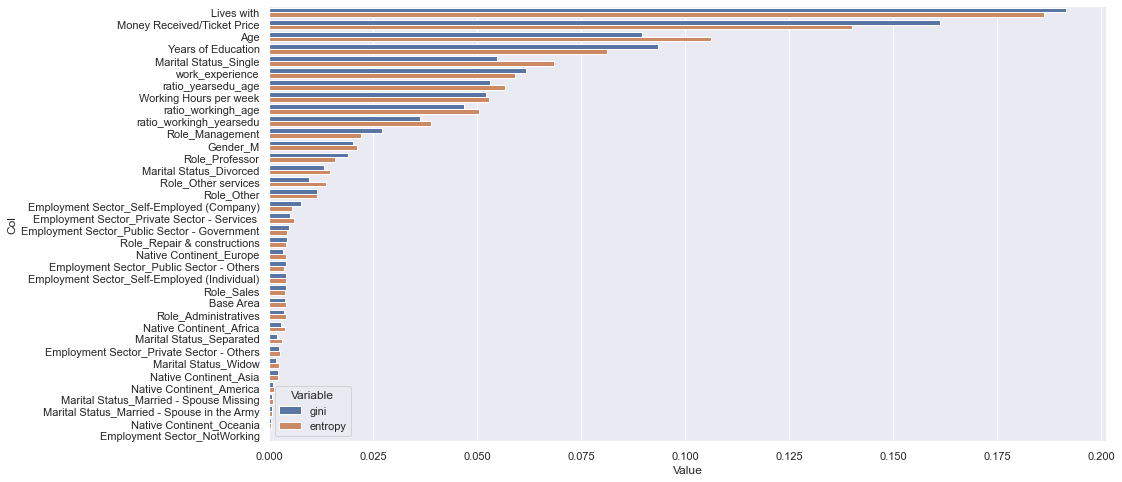

In [180]:
gini_importance = RandomForestClassifier(random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1).fit(X_train, y_train).feature_importances_
entropy_importance = RandomForestClassifier(criterion='entropy',random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1).fit(X_train, y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
plt.show()

In [181]:
rfc_imp = tidy.groupby('Col').mean().query('Value > 0.005').index.to_list()
feature_selection['rfc_imp'] = list(map(lambda x: 1 if x in rfc_imp else 0, feature_selection.index.to_list()))

           Time        Train    Validation f1score train f1score validation
0  5.282+/-0.04  0.892+/-0.0  0.868+/-0.01   0.892+/-0.0       0.868+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.88      0.89      0.88     15149

[[11095   519]
 [ 1176  2359]]
0.8881114264967984
___________________________________________________________________________________________________________
                                     

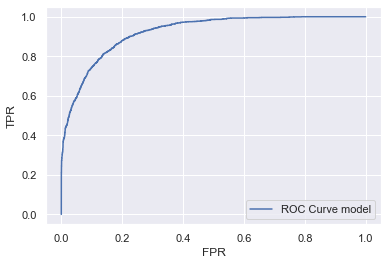

ROC AUC score: 0.9226723656696726


In [182]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train[rfc_imp], X_val[rfc_imp])
y_train_pred = model.predict(X_train[rfc_imp])
rfc_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val[rfc_imp])
rfc_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Gradient Boosting Importance

Gradient boosting importance computes the feature importance by fitting the dataset to a gradient boosting classier and get the importance of each variable for the classification. Then, a threshold is set and all the features above this number are kept.

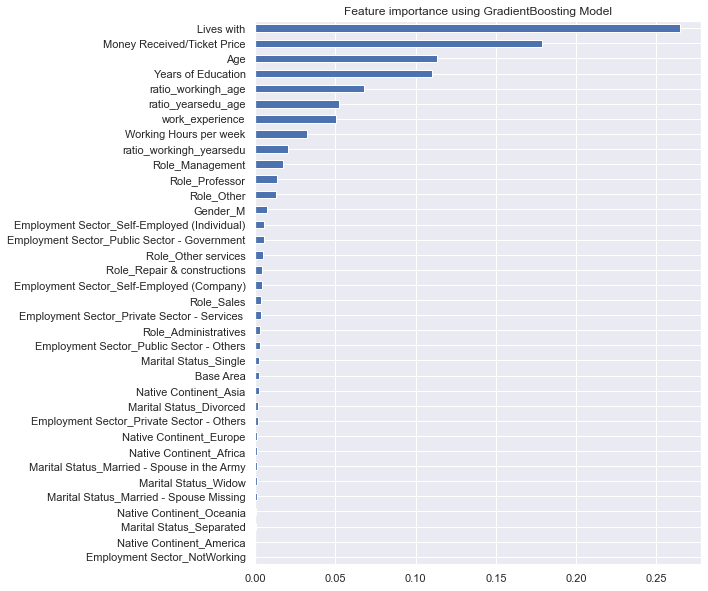

In [183]:
importance = pd.Series(GradientBoostingClassifier(random_state = 7, max_depth = 4, learning_rate  = 0.3, n_estimators = 200, subsample = 0.7).fit(X_train, y_train).feature_importances_, index = X_train.columns)
plot_importance(importance, 'GradientBoosting') 

In [184]:
gb_imp = importance[importance > 0.005].index.to_list()
feature_selection['gb_imp'] = list(map(lambda x: 1 if x in gb_imp else 0, feature_selection.index.to_list()))

           Time        Train    Validation f1score train f1score validation
0  7.222+/-0.06  0.889+/-0.0  0.867+/-0.01   0.889+/-0.0       0.867+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.66      0.73      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.88      0.89      0.88     15149

[[11112   502]
 [ 1203  2332]]
0.8874513169186085
___________________________________________________________________________________________________________
                                     

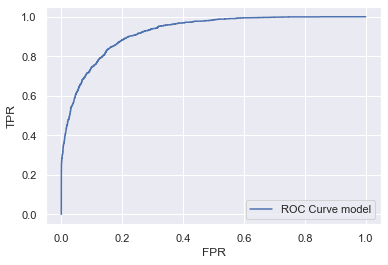

ROC AUC score: 0.9231195477924651


In [185]:
model = GradientBoostingClassifier(random_state = 7,learning_rate = 0.05, max_depth = 4, n_estimators = 400, subsample =  0.999, max_features = 10)
eval_model(model, X_train[gb_imp], X_val[gb_imp])

           Time       Train    Validation f1score train f1score validation
0  5.151+/-0.07  0.89+/-0.0  0.868+/-0.01    0.89+/-0.0       0.868+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.66      0.73      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.88      0.89      0.88     15149

[[11101   513]
 [ 1196  2339]]
0.8871872730873325
___________________________________________________________________________________________________________
                                       

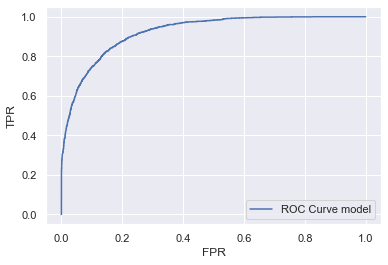

ROC AUC score: 0.9227793711472394


In [186]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train[gb_imp], X_val[gb_imp])
y_train_pred = model.predict(X_train[gb_imp])
gbc_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val[gb_imp])
gbc_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## RFE

RFE or recursive feature elimination is an algorithm that recursively eliminate features, considering smaller and smaller sets of variables. It starts with the whole set of features, and for each iteration retains the top ranked features. The best performance is determined and the top predictors are retrieved as the most important ones.

In [187]:
# #no of features
# nof_list=np.arange(1,35)        
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train2, X_test, y_train2, y_test = train_test_split(X_train,y_train, test_size = 0.3, random_state = 0)
    
#     model = GradientBoostingClassifier(random_state = 7, max_depth = 4, learning_rate  = 0.3, n_estimators = 200, subsample = 0.7)
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train2,y_train2)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train2)
    
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
    
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

In [188]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, learning_rate  = 0.3, n_estimators = 200, subsample = 0.7)
rfe = RFE(estimator = model, n_features_to_select = 30)

In [189]:
X_rfe = rfe.fit_transform(X = X_train, y = y_train) 
rfe_rank = pd.Series(rfe.ranking_, index = X_train.columns)
rfe_feat = rfe_rank[rfe_rank == 1].index.to_list()
feature_selection['rfe'] = list(map(lambda x: 1 if x in rfe_feat else 0, feature_selection.index.to_list()))

           Time        Train    Validation f1score train f1score validation
0  4.708+/-0.06  0.888+/-0.0  0.866+/-0.01   0.888+/-0.0       0.866+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     11614
           1       0.82      0.66      0.73      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.88      0.89      0.88     15149

[[11084   530]
 [ 1193  2342]]
0.8862631196778665
___________________________________________________________________________________________________________
                                     

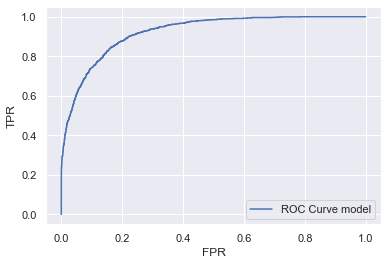

ROC AUC score: 0.9222373161382028


In [190]:
model = GradientBoostingClassifier(random_state = 7,learning_rate = 0.05, max_depth = 4, n_estimators = 400, subsample =  0.999, max_features = 10)
eval_model(model, X_train[rfe_feat], X_val[rfe_feat])

          Time        Train    Validation f1score train f1score validation
0  5.95+/-0.16  0.893+/-0.0  0.867+/-0.01   0.893+/-0.0       0.867+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.82      0.84     15149
weighted avg       0.89      0.89      0.89     15149

[[11094   520]
 [ 1149  2386]]
0.8898277114000924
___________________________________________________________________________________________________________
                                       

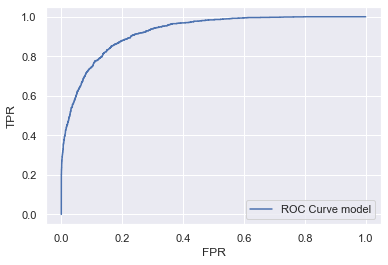

ROC AUC score: 0.9232771388830325


In [191]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train[rfe_feat], X_val[rfe_feat])
y_train_pred = model.predict(X_train[rfe_feat])
rfe_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val[rfe_feat])
rfe_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## LASSO

LASSO or Least Absolute Shrinkage and Selection Operator uses linear regression to perform feature selection in order to enhance the prediction accuracy. The model uses magnitudes while trying to minimize the cost function.

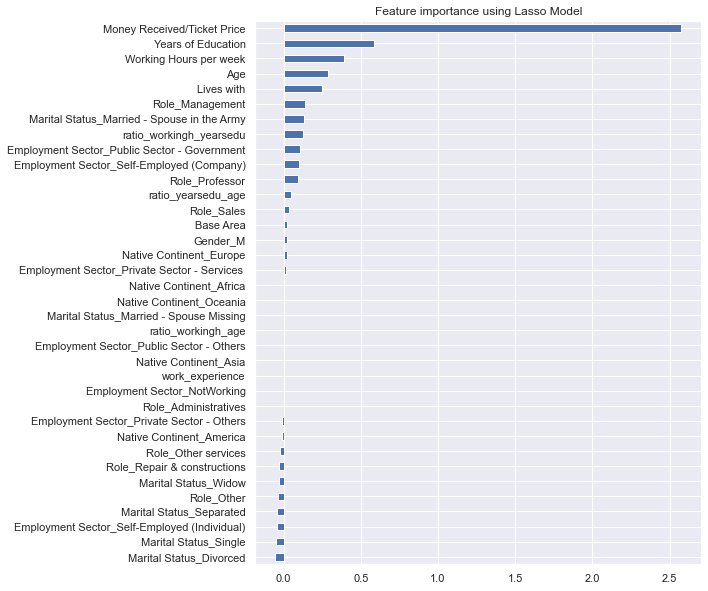

In [192]:
reg = LassoCV()
reg.fit(X=X_train, y=y_train)
coef_lasso = pd.Series(reg.coef_, index = X_train.columns)
plot_importance(coef_lasso, 'Lasso')

In [193]:
lasso_cols = coef_lasso[coef_lasso != 0].index.to_list()
feature_selection['lasso'] = list(map(lambda x: 1 if x in lasso_cols else 0, feature_selection.index.to_list()))


X_train_lasso = X_train[lasso_cols]
X_val_lasso = X_val[lasso_cols]
X_test_lasso = X_test[lasso_cols]

           Time        Train    Validation f1score train f1score validation
0  4.153+/-0.07  0.891+/-0.0  0.869+/-0.01   0.891+/-0.0       0.869+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11614
           1       0.82      0.68      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.89     15149

[[11072   542]
 [ 1143  2392]]
0.8887715360749885
___________________________________________________________________________________________________________
                                     

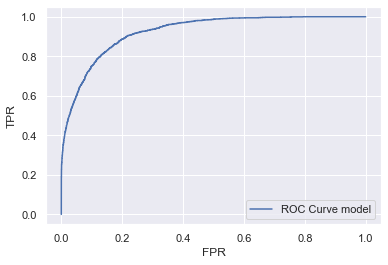

ROC AUC score: 0.9241514147397062


In [194]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_lasso, X_val_lasso)

           Time        Train    Validation f1score train f1score validation
0  4.167+/-0.04  0.891+/-0.0  0.869+/-0.01   0.891+/-0.0       0.869+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11614
           1       0.82      0.68      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.89     15149

[[11072   542]
 [ 1143  2392]]
0.8887715360749885
___________________________________________________________________________________________________________
                                     

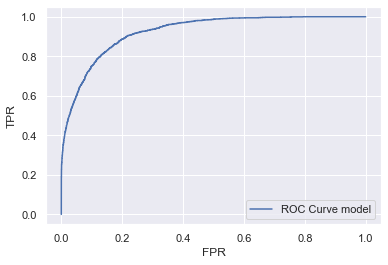

ROC AUC score: 0.9241514147397062


In [195]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_lasso, X_val_lasso)
y_train_pred = model.predict(X_train_lasso)
lasso_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_lasso)
lasso_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## Ridge Regression

Ridge has a similar behaviour as LASSO but instead of using the magnitudes for minimizing the cost function, it uses the squares of the coefficients.

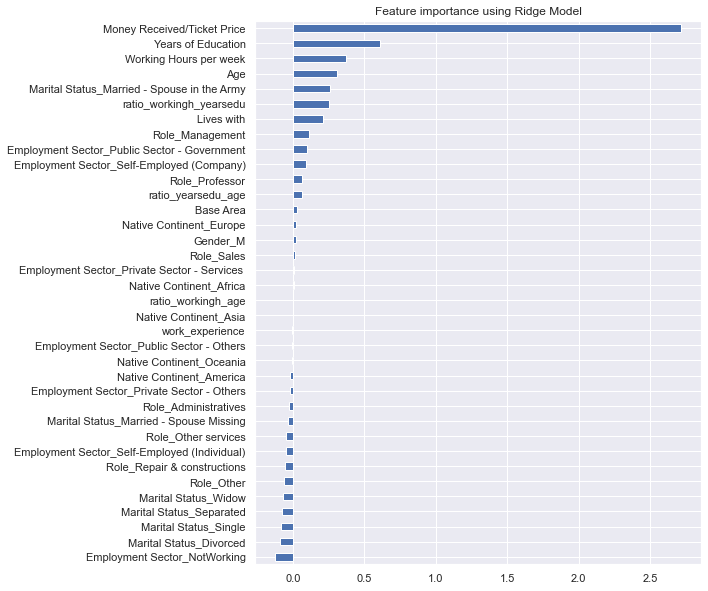

In [196]:
reg = RidgeCV()
reg.fit(X=X_train, y=y_train)
coef_ridge = pd.Series(reg.coef_, index = X_train.columns)
plot_importance(coef_ridge, 'Ridge')

In [197]:
ridge_cols = coef_ridge[~coef_ridge.between(-0.01,0.01)].index.to_list()
feature_selection['ridge'] = list(map(lambda x: 1 if x in ridge_cols else 0, feature_selection.index.to_list()))

           Time        Train    Validation f1score train f1score validation
0  4.144+/-0.03  0.891+/-0.0  0.869+/-0.01   0.891+/-0.0       0.869+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.89     15149

[[11097   517]
 [ 1160  2375]]
0.8892996237375405
___________________________________________________________________________________________________________
                                     

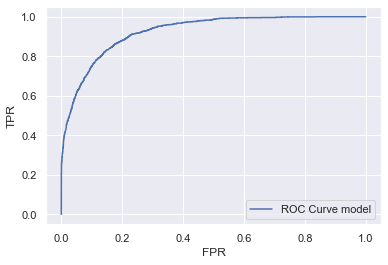

ROC AUC score: 0.9243828621512211


In [198]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train[ridge_cols], X_val[ridge_cols])
y_train_pred = model.predict(X_train[ridge_cols])
ridge_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val[ridge_cols])
ridge_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

## FS based on voting from the models

In order to aggregate the information from all the feature selection algorithm, a voting methodology is used, where the features selected are the ones that were considered as relevant by the algorithms at least 4 times.

In [199]:
feature_selection.groupby(['boruta', 'rfc_imp','gb_imp','rfe','lasso','ridge']).size().to_frame()

0
boruta rfc_imp gb_imp rfe lasso ridge    
0      0       0      0   0     0       1
                                1       2
                          1     1       3
                      1   0     0       2
                                1       1
                          1     0       1
                                1       6
               1      1   1     1       2
1      1       0      1   1     0       1
                                1       4
               1      1   0     0       2
                          1     1      11

In [200]:
feature_selection['sum_fs'] = feature_selection.apply(lambda x : sum(x), axis = 1)

In [201]:
feature_selection['sum_fs'].value_counts()

6    11
3     6
4     5
2     5
5     4
1     4
0     1
Name: sum_fs, dtype: int64

In [202]:
selected_cols = feature_selection.query('sum_fs >= 4').index.to_list()
selected_metric_col = [col for col in metric_col if col in selected_cols]
X_train_metric_selected = X_train[selected_metric_col].copy()
X_val_metric_selected = X_val[selected_metric_col].copy()
X_test_metric_selected = X_test[selected_metric_col].copy()
X_train_selected = X_train[selected_cols].copy()
X_val_selected = X_val[selected_cols].copy()
X_test_selected = X_test[selected_cols].copy()

           Time        Train   Validation f1score train f1score validation
0  5.346+/-0.06  0.893+/-0.0  0.87+/-0.01   0.893+/-0.0        0.87+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.88     15149

[[11102   512]
 [ 1168  2367]]
0.8891015908640835
___________________________________________________________________________________________________________
                                       

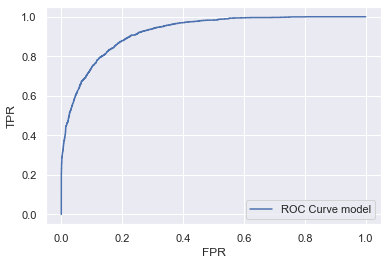

ROC AUC score: 0.9230796362078957


In [203]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_selected, X_val_selected)
y_train_pred = model.predict(X_train_selected)
vote_test_acc = f1_score(y_true = y_train_col, y_pred = y_train_pred, average = 'micro')
y_val_pred = model.predict(X_val_selected)
vote_val_acc = f1_score(y_true = y_val_col, y_pred = y_val_pred, average = 'micro')

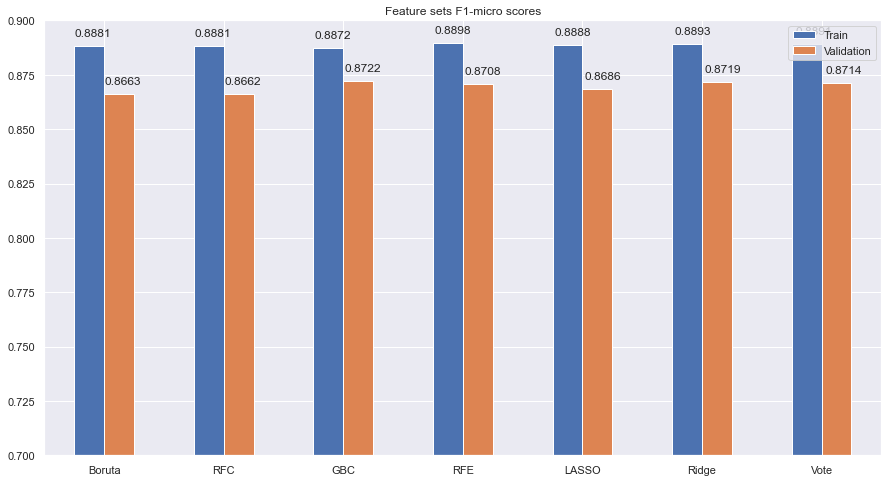

In [204]:
train_acc = np.round([boruta_test_acc,rfc_test_acc,gbc_test_acc,rfe_test_acc,lasso_test_acc,ridge_test_acc,vote_test_acc],4)
val_acc = np.round([boruta_val_acc,rfc_val_acc,gbc_val_acc,rfe_val_acc,lasso_val_acc,ridge_val_acc,vote_val_acc],4)
models = ['Boruta','RFC', 'GBC', 'RFE', 'LASSO', 'Ridge', 'Vote']
df = pd.DataFrame({'Train': train_acc,
                   'Validation': val_acc}, index=models)
ax = df.plot.bar(rot=0, figsize=(15,8) ,  ylim =(0.7,0.9), title = 'Feature sets F1-micro scores')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

The top feature sets have a similar accuracy so we are keeping the one based on voting as it is considered to be the most robust one

# Under&Over Sampling

As we could observe from the exploration of our dataset, we are dealing with an imbalanced dataset, where 76% of the residents has an income below or equal to the average and the reamining 23% above average.

The techniques below are used to adjust the class (Income) distribution. Both oversampling and undersampling involve introducing a bias to select more samples from one class than from another, although they are the opposite. As the name suggests, the former adds data of the minority class while the latter removes samples from the majority class to serve the big purpose of balancing the dataset.

As we are aiming to maximize micro the f1-score, this techniques showed up to be irrelevant.

## SMOTE

In [205]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train_selected, y_train)

           Time        Train    Validation f1score train f1score validation
0  9.063+/-0.07  0.889+/-0.0  0.863+/-0.04   0.889+/-0.0       0.863+/-0.04 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     11614
           1       0.88      0.90      0.89     11614

    accuracy                           0.89     23228
   macro avg       0.89      0.89      0.89     23228
weighted avg       0.89      0.89      0.89     23228

[[10212  1402]
 [ 1193 10421]]
0.8882813845359049
___________________________________________________________________________________________________________
                                     

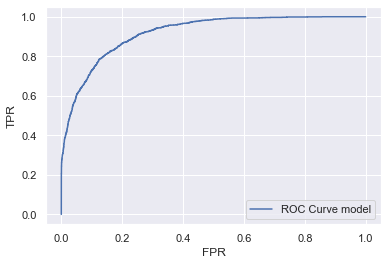

ROC AUC score: 0.9183529642638832


In [206]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_smote, X_val_selected, y_train = y_train_smote)

## Under sampling

In [207]:
rum = RandomUnderSampler()
X_train_rus, y_train_rus = rum.fit_sample(X_train, y_train)

           Time        Train    Validation f1score train f1score validation
0  2.824+/-0.04  0.893+/-0.0  0.808+/-0.03   0.893+/-0.0       0.808+/-0.03 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3535
           1       0.89      0.88      0.88      3535

    accuracy                           0.89      7070
   macro avg       0.89      0.89      0.89      7070
weighted avg       0.89      0.89      0.89      7070

[[3141  394]
 [ 419 3116]]
0.885007072135785
___________________________________________________________________________________________________________
                                          

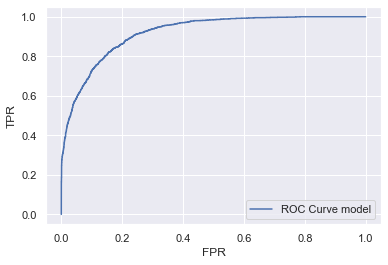

ROC AUC score: 0.9187968314710138


In [208]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
y = y_train_rus
eval_model(model, X_train_rus, X_val, y_train = y_train_rus)

# PCA

We also teste to apply principal component analysis, that is the technique of reducing the number of variables by having a smaller number of orthogonal vectors that explain to some degree the variance of the features. This could be useful to deal with problems such as overfitting, however it decreased the performance of our model, so it wasn’t applied to the data.

In [209]:
# Use PCA to reduce dimensionality of data
df_pca = pd.concat([X_train, X_val]).copy()
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

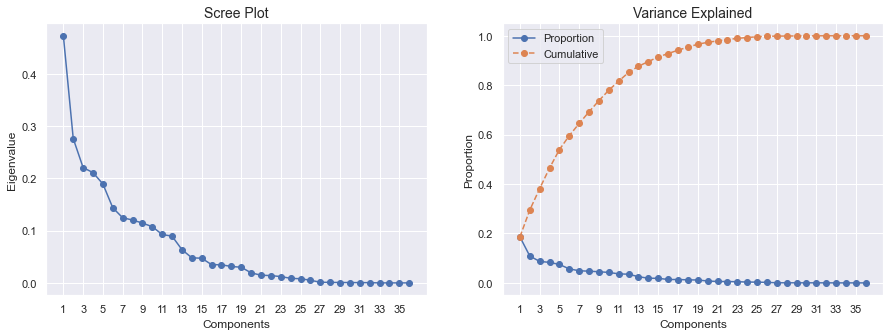

In [210]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [211]:
pca = PCA(n_components=13)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
X_pca = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)
X_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CITIZEN_ID,,,,,,,,,,,,,
12876,0.476373,-0.975939,-0.250704,0.294094,-0.369908,0.064405,0.040448,-0.045571,-0.074988,-0.114039,0.012377,-0.069910,-0.018088
17734,-0.700241,-0.731080,0.304909,-0.065279,-0.223011,-0.218840,-0.040273,0.027855,-0.021418,-0.013900,-0.007638,-0.135045,-0.012871
18384,-0.716171,-0.733417,0.336097,-0.074562,-0.223557,-0.198117,-0.035271,0.049962,-0.014153,0.009084,-0.002848,-0.131011,-0.012244
27476,1.053081,0.088236,-0.342526,-0.247741,-0.009939,-0.273324,0.031692,-0.004009,-0.017531,0.820632,0.127010,-0.321290,-0.017766
29806,-0.695963,-0.754601,0.320641,-0.073932,-0.219829,-0.195126,-0.032231,0.064649,-0.009004,0.020329,0.000838,-0.131146,-0.006199


In [212]:
X_train_pca = pd.DataFrame(X_pca.loc[X_train.index,:], index = X_train.index)
X_val_pca = pd.DataFrame(X_pca.loc[X_val.index,:], index = X_val.index)

            Time        Train    Validation f1score train f1score validation
0  11.336+/-0.19  0.871+/-0.0  0.832+/-0.01   0.871+/-0.0       0.832+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11614
           1       0.77      0.61      0.68      3535

    accuracy                           0.87     15149
   macro avg       0.83      0.78      0.80     15149
weighted avg       0.86      0.87      0.86     15149

[[10974   640]
 [ 1368  2167]]
0.867449996699452
___________________________________________________________________________________________________________
                                    

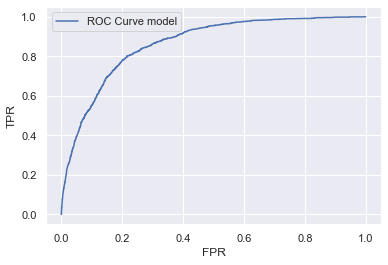

ROC AUC score: 0.8628120164366777


In [213]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_pca, X_val_pca)

# Stacked models

In this section we are combining diffrent machine learning models to improve the accuracy.

## Stacking Classifier

           Time         Train   Validation f1score train f1score validation
0  27.66+/-0.34  0.887+/-0.01  0.865+/-0.0  0.887+/-0.01        0.865+/-0.0 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11614
           1       0.79      0.67      0.72      3535

    accuracy                           0.88     15149
   macro avg       0.84      0.80      0.82     15149
weighted avg       0.88      0.88      0.88     15149

[[10971   643]
 [ 1183  2352]]
0.8794639910225097
___________________________________________________________________________________________________________
                                     

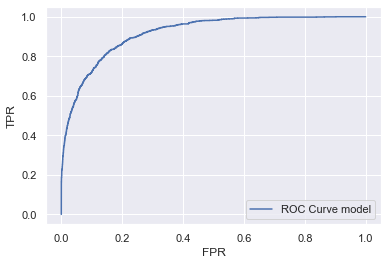

ROC AUC score: 0.9175068651903359


In [214]:
estimators = [
#              ('LGR', LogisticRegression() ),
             ('GNB', GaussianNB(var_smoothing = 0.5) ),
             ('SVC', SVC(random_state = 7, probability=True, C = 100, kernel = 'rbf') ),
             ('KNC', KNeighborsClassifier(n_neighbors=100)),
             ('RFC', RandomForestClassifier(random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1)),
             ('XGB', GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)),
             ('MLPC', MLPClassifier(random_state = 7, solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (30,30,30))),
             ('DTC', DecisionTreeClassifier(random_state = 7, min_samples_split = 350, criterion = 'entropy', max_depth = 6))
                ]

classifier = StackingClassifier(estimators, LogisticRegression(), cv = 2)
eval_model(classifier, X_train_selected, X_val_selected, splits= 2)

## Manual stacking

With the sklearn stacking we need to use the same dataset to create probabilities for each model, while we want to use different datasets for different models, in particular the complete dataset with categorical variables only for tree based models.

In [215]:
models =     [
#              (LogisticRegression(), 'LGR', True),
             (GaussianNB(var_smoothing = 0.5), 'GNB', True),
             (SVC(random_state = 7, probability=True, C = 100, kernel = 'rbf'), 'SVC', True),
             (KNeighborsClassifier(n_neighbors=100),'KNC', True),
             (RandomForestClassifier(random_state=7, n_estimators = 400, max_depth = 15, min_samples_split = 30, max_samples = 0.1),  'RFC', False),
             (GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200),  'XGB', False),
             (MLPClassifier(random_state = 7, solver = 'lbfgs', activation = 'relu', hidden_layer_sizes = (30,30,30)), 'MLPC', True),
             (DecisionTreeClassifier(random_state = 7, min_samples_split = 350, criterion = 'entropy', max_depth = 6), 'DTC', False)
             ]

We are going to keep only the probabilities of each point of being 0 for each model, since the probability of being one is a linear combination of the other one. **p(1) = 1 - p(0)** 

           Time        Train    Validation f1score train f1score validation
0  0.032+/-0.01  0.889+/-0.0  0.889+/-0.01   0.889+/-0.0       0.889+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.88     15149

[[11091   523]
 [ 1164  2371]]
0.8886395141593505
___________________________________________________________________________________________________________
                                     

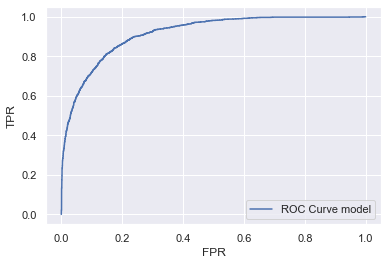

ROC AUC score: 0.9148490984092382


In [216]:
dataframe_probabilities_train = pd.DataFrame()
dataframe_probabilities_val = pd.DataFrame()
# dataframe_probabilities_test = pd.DataFrame()
for model, model_name, only_metric in models:
    if only_metric:
        model.fit(X_train_selected, y_train)
        train_proba = model.predict_proba(X_train_selected)
        dataframe_probabilities_train[f'{model_name}_0'] = train_proba[:,0]
#         dataframe_probabilities_train[f'{model_name}_1'] = train_proba[:,1]
        val_proba = model.predict_proba(X_val_selected)
        dataframe_probabilities_val[f'{model_name}_0'] = val_proba[:,0]
#         dataframe_probabilities_val[f'{model_name}_1'] = val_proba[:,1]
#         test_proba = model.predict_proba(X_test_selected)
#         dataframe_probabilities_test[f'{model_name}_0'] = test_proba[:,0]
#         dataframe_probabilities_test[f'{model_name}_1'] = test_proba[:,1]
    else:
        model.fit(X_train_metric_selected, y_train)
        train_proba = model.predict_proba(X_train_metric_selected)
        dataframe_probabilities_train[f'{model_name}_0'] = train_proba[:,0]
#         dataframe_probabilities_train[f'{model_name}_1'] = train_proba[:,1]
        val_proba = model.predict_proba(X_val_metric_selected)
        dataframe_probabilities_val[f'{model_name}_0'] = val_proba[:,0]
#         dataframe_probabilities_val[f'{model_name}_1'] = val_proba[:,1]
#         test_proba = model.predict_proba(X_test_metric_selected)
#         dataframe_probabilities_test[f'{model_name}_0'] = test_proba[:,0]
#         dataframe_probabilities_test[f'{model_name}_1'] = test_proba[:,1]

dataframe_probabilities_train.index = data_train.index.to_list()
dataframe_probabilities_val.index = data_val.index.to_list()
# dataframe_probabilities_test.index = data_test.index.to_list()

regressor = LogisticRegression(random_state=7)

y = y_train
eval_model(regressor, dataframe_probabilities_train, dataframe_probabilities_val)

Logistic regression automatically classifies looking at the probabilities, and put the class that has the probability higher than 0.5, we try exploring what happens if we change this threshold. 

In [217]:
model = LogisticRegression(random_state=7)
model.fit(dataframe_probabilities_train, y_train)
pred_proba_df = pd.DataFrame(model.predict_proba(dataframe_probabilities_val))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_val_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = f1_score(y_true = y_val, y_pred = y_val_pred[1], average = 'micro')
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_val, y_val_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.6750346527029109
[[2928 2050]
 [  60 1455]]

******** For i = 0.1 ******
Our testing accuracy is 0.7833050977976281
[[3719 1259]
 [ 148 1367]]

******** For i = 0.15 ******
Our testing accuracy is 0.8210380409671956
[[4038  940]
 [ 222 1293]]

******** For i = 0.2 ******
Our testing accuracy is 0.8381333744032035
[[4207  771]
 [ 280 1235]]

******** For i = 0.25 ******
Our testing accuracy is 0.8496842753734792
[[4345  633]
 [ 343 1172]]

******** For i = 0.3 ******
Our testing accuracy is 0.8570768519944556
[[4458  520]
 [ 408 1107]]

******** For i = 0.35 ******
Our testing accuracy is 0.8620052364084398
[[4544  434]
 [ 462 1053]]

******** For i = 0.4 ******
Our testing accuracy is 0.864931464654243
[[4611  367]
 [ 510 1005]]

******** For i = 0.45 ******
Our testing accuracy is 0.8669336208224242
[[4669  309]
 [ 555  960]]

******** For i = 0.5 ******
Our testing accuracy is 0.8670876328353612
[[4718  260]
 [ 603  912]]

*****

# Final Model

After evaluating all the models, Gradient Boosting Classifier had the best results on classifying the income of each costumer and was elected to be our final model.
We also applied GridSearchCV to find the best parameters for our model (the cell is commented due to the excessive amount of time it takes to run)

In [218]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
#     "min_samples_split": np.linspace(0.1,1, 2,4, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5,1,2, 12),
#     "max_depth":[3,4,5,6,8],
#     "max_features":["log2","sqrt",8,9,10,11,12],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.8, 0.95,0.999, 1.0],
#     "n_estimators":[10,270,300, 325,375,400,425,450]
#     }


# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
# clf.fit(X_train_lasso , y_train)
# clf.best_params_

           Time        Train   Validation f1score train f1score validation
0  5.394+/-0.09  0.893+/-0.0  0.87+/-0.01   0.893+/-0.0        0.87+/-0.01 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11614
           1       0.82      0.67      0.74      3535

    accuracy                           0.89     15149
   macro avg       0.86      0.81      0.83     15149
weighted avg       0.89      0.89      0.88     15149

[[11102   512]
 [ 1168  2367]]
0.8891015908640835
___________________________________________________________________________________________________________
                                       

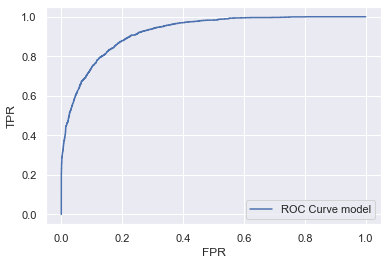

ROC AUC score: 0.9230796362078957


In [219]:
model = GradientBoostingClassifier(random_state = 7, max_depth = 4, n_estimators = 200)
eval_model(model, X_train_selected, X_val_selected)

# Predicting

In [220]:
pred =  model.predict(X_test_selected)

In [221]:
predictions = pd.DataFrame(pred, index = X_test.index, columns = ['Income'])

In [222]:
predictions.value_counts()

Income
0         8035
1         2065
dtype: int64

In [223]:
predictions

,Income
CITIZEN_ID,
34886,1
34887,0
34888,1
34889,0
34890,1
...,...
44981,1
44982,1
44983,0


In [224]:
predictions.to_csv('predictions.csv')

# References

- https://en.wikipedia.org/wiki/Power_transform - Box-Cox & Yeo-Jhonson
- https://machinelearningmastery.com/quantile-transforms-for-machine-learning/ Quantile transformation
- https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot qqplot
- http://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755 univariate outliers detection
- http://eurekastatistics.com/using-the-median-absolute-deviation-to-find-outliers/ median absolute deviation